In [2]:
#### Entete 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#NLTK
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

#ACP
from ACP_KMEANS_functions import *

#regex
import re

In [3]:
df = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [4]:
# creation categorie
df['category'] = df.product_category_tree.apply(lambda x : x.split('>>')[0][2:].strip() )


#on gere les . sans espace
df[['description_regex']] = df.description.apply(lambda phrase: re.sub(r"\.(?=[a-zA-Z])", " ", phrase))

# traitement nom produit
df['product_name_lower'] = df.product_name.str.lower()

# traitement description 
df['description_lower'] = df.product_name.str.lower() + " " + df.description_regex.str.lower()
df['description_tokenize'] = df.description_lower.apply(lambda x : word_tokenize(x))


In [5]:
df['category'] = df['category'].str.replace("&", "and")

In [6]:
# creation d'un variable numerique pour la categorie

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df[['category_label']] = label_enc.fit_transform(df.category)
label_enc.inverse_transform([0,1,2,3,4,5,6])

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor and Festive Needs', 'Home Furnishing',
       'Kitchen and Dining', 'Watches'], dtype=object)

## les categories sont bien reparties

In [18]:
df.category.value_counts()

Baby Care                       150
Kitchen and Dining              150
Watches                         150
Home Decor and Festive Needs    150
Beauty and Personal Care        150
Home Furnishing                 150
Computers                       150
Name: category, dtype: int64

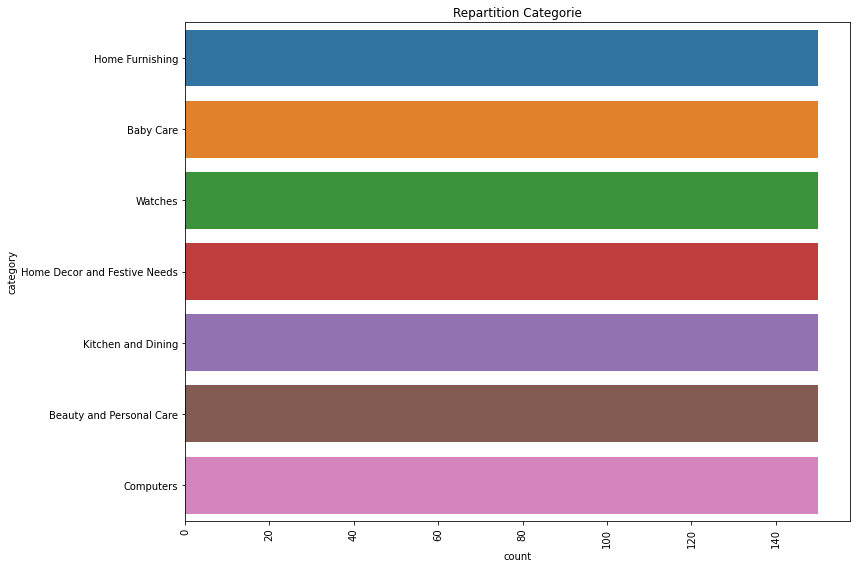

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df, y='category', orient='h')
plt.xticks(rotation=90)
plt.title("Repartition Categorie")
plt.tight_layout()
plt.savefig('P01_01_repartition categorie.jpg')
plt.show()

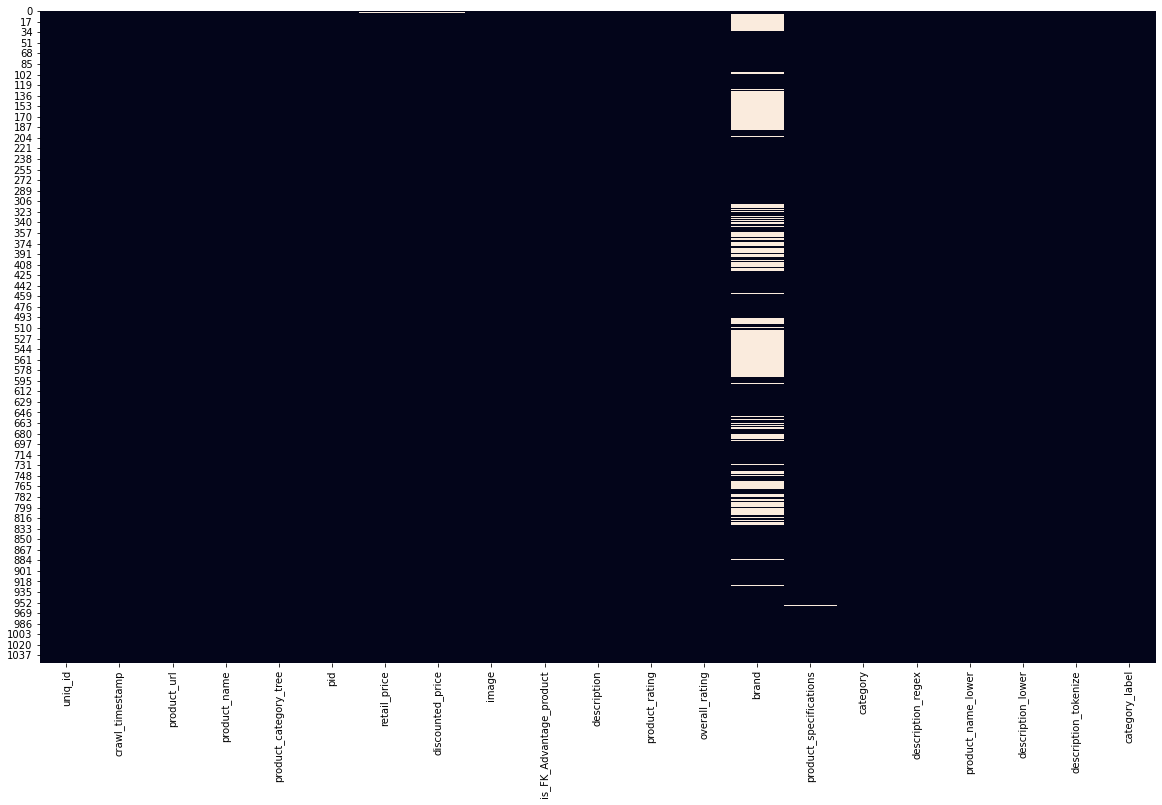

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isna(), cbar= False)
plt.show()

In [21]:
# Pas de NAN dans les colonnes que nous allons utilisés
df[['product_name', 'description', 'image', 'product_category_tree']].isna().sum()

product_name             0
description              0
image                    0
product_category_tree    0
dtype: int64

## demonstration traitements mots

In [22]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product  ...       product_rating       overall_rating  \
0                    False  ...  No rating available  No rating available   
1                    False  ...  No rating available  No rating available   
2                    False  ...  No rating available  No rating available   
3                    False  ...  No rating available  No rating available   
4                    False  ...  No rating available  No rating available   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

          category                                  description_regex  \
0  Home Furnishing  Key Features of Elegance Polyester Multicolor ...   
1        Baby Care  Specifications of Sathiyas Cotton Bath Towel (...   
2        Baby Care  Key Features of Eurospa Cotton Terry Face Towe...   
3  Home Furnishing  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Home Furnishing  Key Features of Jaipur Print Cotton Floral Kin...   

                                  product_name_lower  \
0  elegance polyester multicolor abstract eyelet ...   
1                         sathiyas cotton bath towel   
2                eurospa cotton terry face towel set   
3  santosh royal fashion cotton printed king size...   
4  jaipur print cotton floral king sized double b...   

                                   description_lower  \
0  elegance polyester multicolor abstract eyelet ...   
1  sathiyas cotton bath towel specifications of s...   
2  eurospa cotton terry face towel set key featur...   
3  santosh royal fashion cotton printed king size...   
4  jaipur print cotton floral king sized double b...   

          

In [23]:
pd.set_option('display.max_colwidth', None)

print(len(df['product_name'][0] + ' ' + df['description'][0]), "caracteres :", df['product_name'][0] + ' ' + df['description'][0])
print("#############################################################################################################################")
print("MINUSCULE")
print(len(df['description_lower'][0]), "caracteres :", df['description_lower'][0])
print("#############################################################################################################################")
print("TOKENIZE")
print(len(df['description_tokenize'][0]), "mots :", df['description_tokenize'][0])


1479 caracteres : Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring

## mise en place des stopWords

In [24]:
stopW = stopwords.words('english')
# on va rajouter la ponctuation au stopwords
exclude = set(punctuation)
stopW.extend(exclude)

In [25]:
df['description_stopw'] = df.description_tokenize.apply(lambda x : [word for word in x if word not in stopW ])


In [26]:
print("STOPWORDS")
print(len(df['description_stopw'][0]), "mots :", df['description_stopw'][0])


STOPWORDS
169 mots : ['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'features', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'makes', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant-', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'eveni

## lemmatisation

In [27]:
lemma = WordNetLemmatizer()

df['description_lemma'] = df.description_stopw.apply(lambda x : [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word,"a"), "v"), "n") for word in x])


In [28]:
print("LEMMATIZE")
print(len(df['description_lemma'][0]), "mots :", df['description_lemma'][0])


LEMMATIZE
169 mots : ['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'r', '899', 'curtain', 'enhance', 'look', 'interior', 'curtain', 'make', '100', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'love', 'curtain', 'ant-', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'even', 'create', 

## comparaison lemmatisation stemmatisation

In [36]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()

print("{0:20}{1:20}{2:20}{3:20}".format("MOT","LEMMATIZE","STEM PORTER", "STEM LANCASTER"))
      
for word in df['description_stopw'][0]:
    print("{0:20}{1:20}{2:20}{3:20}".format(word,lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word,"a"), "v"), "n"),porter.stem(word),lancaster.stem(word)))

MOT                 LEMMATIZE           STEM PORTER         STEM LANCASTER      
elegance            elegance            eleg                eleg                
polyester           polyester           polyest             polyest             
multicolor          multicolor          multicolor          multicol            
abstract            abstract            abstract            abstract            
eyelet              eyelet              eyelet              eyelet              
door                door                door                door                
curtain             curtain             curtain             curtain             
key                 key                 key                 key                 
features            feature             featur              feat                
elegance            elegance            eleg                eleg                
polyester           polyester           polyest             polyest             
multicolor          multicol

## Bag of Words

In [29]:
df['description_tfidfmat'] = df.description_lemma.apply(lambda x : ' '.join(x))

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer(ngram_range=(1,2))
#transform
Count_data = CountVec.fit_transform(df.description_tfidfmat)


In [31]:
bow=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
bow.head()

00  00 type  000  000 sq  001  001 material  001 usb  0021  0021 box  004  \
0   0        0    0       0    0             0        0     0         0    0   
1   0        0    0       0    0             0        0     0         0    0   
2   0        0    0       0    0             0        0     0         0    0   
3   0        0    0       0    0             0        0     0         0    0   
4   0        0    0       0    0             0        0     0         0    0   

   ...  zone print  zone uv  zoom  zoom type  zora  zora laptop  zyxel  \
0  ...           0        0     0          0     0            0      0   
1  ...           0        0     0          0     0            0      0   
2  ...           0        0     0          0     0            0      0   
3  ...           0        0     0          0     0            0      0   
4  ...           0        0     0          0     0            0      0   

   zyxel 3d  zyxel pla  zyxel vmg1312  
0         0          0              0  
1         0          0              0  
2         0          0              0  
3         0          0              0  
4         0          0              0  

[5 rows x 26131 columns]

### exemple bag of Words premiere ligne

In [40]:
colonne = bow.iloc[0,:]!=0

In [41]:
column_afic = bow.columns[colonne]

In [42]:
pd.set_option('display.max_columns', None)
bow[column_afic].head(1)

100  100 high  213  213 cm  899  899 curtain  abstract  abstract eyelet  \
0    1         1    3       3    1            1         5                4   

   abstract polyester  amount  amount sunlight  ant  ant wrinkle  anti  \
0                   1       1                1    1            1     1   

   anti shrinkage  apart  apart first  apparance  apparance give  appeal  \
0               1      1            1          1               1       1   

   appeal design  attention  attention sure  beauty  beauty give  body  \
0              1          1               1       1            1     1   

   body design  box  box number  brand  brand elegance  bright  \
0            1    1           1      1               1       2   

   bright modernistic  bright sun  bring  bring home  close  close even  cm  \
0                   1           1      1           1      1           1   3   

   cm box  cm height  color  color multicolor  contemporary  \
0       1          2      1                 1             1   

   contemporary eyelet  content  content sale  create  create special  \
0                    1        1             1       1               1   

   curtain  curtain 213  curtain ant  curtain body  curtain elegance  \
0       12            2            1             1                 1   

   curtain enhance  curtain floral  curtain key  curtain make  curtain set  \
0                1               1            1             1            1   

   curtain slide  curtain softly  design  design door  design material  \
0              1               1       3            1                1   

   design surreal  dimension  dimension length  door  door curtain  door type  \
0               1          1                 1     6             5          1   

   draw  draw apart  draw close  duster25  duster25 color  elegance  \
0     2           1           1         1               1         5   

   elegance design  elegance polyester  elegant  elegant apparance  \
0                1                   4        2                  1   

   elegant curtain  enhance  enhance look  environment  environment romantic  \
0                1        1             1            1                     1   

   even  even create  eyelet  eyelet door  eyelet model  eyelet style  \
0     1            1       7            4             1             1   

   eyelet valance  fabric  fabric feature  feature  feature elegance  \
0               1       1               1        2                 1   

   feature eyelet  filter  filter light  first  first thing  floral  \
0               1       1             1      1            1       1   

   floral curtain  general  general brand  get  get right  give  give home  \
0               1        1              1    1          1     2          1   

   give soothe  good  good morning  heart  heart contemporary  height  \
0            1     1             1      1                   1       2   

   height pack  high  high quality  home  home bright  home elegant  id  \
0            2     1             1     2            1             1   1   

   id duster25  interior  interior curtain  joyous  joyous beauty  key  \
0            1         1                 1       1              1    1   

   key feature  length  length 213  light  light room  look  look interior  \
0            1       1           1      1           1     1              1   

   love  love curtain  make  make 100  make room  material  \
0     1             1     2         1          1         1   

   material polyester  metal  metal ring  model  model id  model name  \
0                   1      1           1      2         1           1   

   modernistic  modernistic appeal  moment  moment joyous  morning  \
0            1                   1       1              1        2   

   morning welcome  morning whole  multicolor  multicolor abstract  \
0                1              1           5                    4   

   multicolor dimens

In [43]:
#frequence utilisation des mots au moins une fois dans un article
bow.mean().sort_values(ascending=False).head(30)

product                  0.823810
cm                       0.643810
free                     0.592381
buy                      0.556190
ship                     0.542857
replacement              0.540952
delivery                 0.540000
ship cash                0.537143
genuine product          0.537143
genuine                  0.537143
cash delivery            0.537143
free ship                0.537143
cash                     0.537143
price                    0.531429
day                      0.529524
mug                      0.507619
watch                    0.481905
30                       0.479048
flipkart                 0.458095
com                      0.450476
guarantee                0.450476
flipkart com             0.449524
day replacement          0.448571
product 30               0.446667
30 day                   0.446667
replacement guarantee    0.446667
set                      0.426667
baby                     0.395238
feature                  0.388571
design        

## TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words=stopW, analyzer='word', ngram_range=(1,2))

tfidfmat = vect.fit_transform(df.description_tfidfmat)

In [33]:
tfidfmat.shape

(1050, 26055)

In [34]:
feature_names = vect.get_feature_names()
dense = tfidfmat.todense()
denselist = dense.tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
tf_idf.head()

00  00 type  000  000 sq  001  001 material  001 usb  0021  0021 box  004  \
0  0.0      0.0  0.0     0.0  0.0           0.0      0.0   0.0       0.0  0.0   
1  0.0      0.0  0.0     0.0  0.0           0.0      0.0   0.0       0.0  0.0   
2  0.0      0.0  0.0     0.0  0.0           0.0      0.0   0.0       0.0  0.0   
3  0.0      0.0  0.0     0.0  0.0           0.0      0.0   0.0       0.0  0.0   
4  0.0      0.0  0.0     0.0  0.0           0.0      0.0   0.0       0.0  0.0   

   ...  zone print  zone uv  zoom  zoom type  zora  zora laptop  zyxel  \
0  ...         0.0      0.0   0.0        0.0   0.0          0.0    0.0   
1  ...         0.0      0.0   0.0        0.0   0.0          0.0    0.0   
2  ...         0.0      0.0   0.0        0.0   0.0          0.0    0.0   
3  ...         0.0      0.0   0.0        0.0   0.0          0.0    0.0   
4  ...         0.0      0.0   0.0        0.0   0.0          0.0    0.0   

   zyxel 3d  zyxel pla  zyxel vmg1312  
0       0.0        0.0            0.0  
1       0.0        0.0            0.0  
2       0.0        0.0            0.0  
3       0.0        0.0            0.0  
4       0.0        0.0            0.0  

[5 rows x 26055 columns]

### exemple tf-idf premiere ligne

In [47]:
colonne = tf_idf.iloc[0,:]!=0

In [48]:
column_afic = tf_idf.columns[colonne]

In [49]:
pd.set_option('display.max_columns', None)
tf_idf[column_afic].head(1)

100  100 high       213    213 cm       899  899 curtain  abstract  \
0  0.025938  0.045449  0.126191  0.130627  0.034784     0.048135  0.137522   

   abstract eyelet  abstract polyester    amount  amount sunlight       ant  \
0         0.181794            0.048135  0.043542         0.048135  0.043542   

   ant wrinkle      anti  anti shrinkage     apart  apart first  apparance  \
0     0.048135  0.037471        0.045449  0.045449     0.048135   0.048135   

   apparance give    appeal  appeal design  attention  attention sure  \
0        0.048135  0.036263       0.048135   0.042064        0.048135   

     beauty  beauty give      body  body design       box  box number  \
0  0.036263     0.048135  0.024577     0.030889  0.016089    0.023945   

      brand  brand elegance    bright  bright modernistic  bright sun  \
0  0.017141        0.048135  0.074941            0.048135    0.048135   

      bring  bring home     close  close even        cm    cm box  cm height  \
0  0.028121    0.040856  0.045449    0.048135  0.053161  0.028801   0.065756   

     color  color multicolor  contemporary  contemporary eyelet  content  \
0  0.01658          0.028285      0.035732             0.048135  0.01966   

   content sale    create  create special   curtain  curtain 213  curtain ant  \
0      0.020225  0.036839        0.048135  0.386955     0.087085     0.048135   

   curtain body  curtain elegance  curtain enhance  curtain floral  \
0      0.048135          0.048135         0.048135        0.048135   

   curtain key  curtain make  curtain set  curtain slide  curtain softly  \
0     0.037471      0.048135     0.048135       0.048135        0.048135   

    design  design door  design material  design surreal  dimension  \
0  0.05529     0.042064         0.036839        0.048135   0.019527   

   dimension length      door  door curtain  door type      draw  draw apart  \
0          0.027806  0.199306      0.171782   0.038949  0.079668    0.048135   

   draw close  duster25  duster25 color  elegance  elegance design  \
0    0.048135  0.048135        0.048135  0.199171         0.048135   

   elegance polyester   elegant  elegant apparance  elegant curtain   enhance  \
0            0.192541  0.060382           0.048135         0.048135  0.035241   

   enhance look  environment  environment romantic      even  even create  \
0      0.048135     0.042064              0.048135  0.038169     0.048135   

     eyelet  eyelet door  eyelet model  eyelet style  eyelet valance  \
0  0.230145     0.152676      0.036839      0.045449        0.048135   

     fabric  fabric feature   feature  feature elegance  feature eyelet  \
0  0.021173        0.048135  0.031313          0.048135        0.048135   

     filter  filter light     first  first thing    floral  floral curtain  \
0  0.045449      0.048135  0.036839     0.045449  0.028285        0.048135   

    general  general brand       get  get right      give  give home  \
0  0.015274       0.020324  0.026675   0.048135  0.048239   0.040856   

   give soothe      good  good morning     heart  heart contemporary  \
0     0.048135  0.029974      0.048135  0.043542            0.048135   

     height  height pack     high  high quality      home  home bright  \
0  0.045971     0.072525  0.02412       0.02571  0.047057     0.048135   

   home elegant        id  id duster25  interior  interior curtain    joyous  \
0      0.048135  0.026175     0.048135  0.036839          0.048135  0.048135   

   joyous beauty       key  key feature    length  length 213     light  \
0       0.048135  0.017522     0.017554  0.024483    0.043542  0.025489   

   light room      look  look interior      love  love curtain      make  \
0    0.048135  0.024577       0.048135  0.024672      0.048135  0.036274   

   make 100  make room  material  material polyester     metal  metal ring  \
0  0.038169   0.048135  0.017392            0.033955  0.033955    0.045449   

      model  model id  model name  modernistic

In [50]:
pd.reset_option('display.max_columns')


In [51]:
tf_idf.mean().sort_values(ascending=False).head(30)

watch                    0.020076
flipkart com             0.018878
com                      0.018868
flipkart                 0.018807
mug                      0.018414
cm                       0.017915
product                  0.017683
analog                   0.017242
set                      0.017071
free                     0.016532
ship                     0.016475
cash delivery            0.016443
genuine                  0.016443
ship cash                0.016443
cash                     0.016443
genuine product          0.016443
free ship                0.016443
delivery                 0.016429
buy                      0.016370
analog watch             0.016255
day                      0.015011
baby                     0.015008
replacement              0.014852
30                       0.014619
guarantee                0.014276
30 day                   0.014255
product 30               0.014255
replacement guarantee    0.014255
day replacement          0.014244
combo         

In [147]:
# separation en un jeu de modelisation et un jeu pour comparer les modeles 
from sklearn.model_selection import train_test_split

df_model, df_score = train_test_split(df, test_size=0.15, stratify=df.category, random_state = 1944)

df_model.sort_index(inplace=True)
df_score.sort_index(inplace=True)

index_model = df_model.index
index_score = df_score.index

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# cluster categorie TF-IDF et BOW 

In [39]:
tf_idf_model = tf_idf.iloc[index_model,:].copy()
tf_idf_score = tf_idf.iloc[index_score,:].copy()
bow_model = bow.iloc[index_model,:].copy()
bow_score = bow.iloc[index_score,:].copy()

In [40]:
from sklearn.cluster import KMeans

km_tf =  KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_tf.fit(tf_idf_model)

km_bow =  KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_bow.fit(bow_model)


KMeans(n_clusters=7, random_state=0)

In [44]:
from sklearn.metrics.cluster import adjusted_rand_score

ari_tf = adjusted_rand_score(df_model['category'], km_tf.labels_)
ari_bow = adjusted_rand_score(df_model['category'], km_bow.labels_)

print(f'ARI BOW: {ari_bow:.3f}')
print(f'ARI TFIDF: {ari_tf:.3f}')


ARI BOW: 0.162
ARI TFIDF: 0.262


In [45]:
df_model['category_label']

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: category_label, Length: 892, dtype: int32

In [48]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 4, 1, 0, 3, 5, 2, 6]
    print ("Correspondance des clusters : ", corresp)
    print()
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

conf_mat = confusion_matrix(df_score['category_label'],  km_bow.predict(bow_score))
print(conf_mat)
print()

cls_labels_transform = conf_mat_transform(df_score['category_label'], km_bow.predict(bow_score))
accuracy_bow = accuracy_score(df_score['category_label'], cls_labels_transform)
print("ACCURACY SCORE BOW: {:.3}".format(accuracy_bow))
print()
conf_mat = confusion_matrix(df_score['category_label'], cls_labels_transform)
print(conf_mat)
print()
print(classification_report(df_score['category_label'], cls_labels_transform))

[[ 5  0 14  0  0  4  0]
 [11  0  0  0  0 11  0]
 [ 7  0  0  0  0 16  0]
 [10  0  0  0  0 13  0]
 [12  0  0  0  0 11  0]
 [ 8  0  0  0  4 10  0]
 [ 0  0  0  0  0  1 21]]

Correspondance des clusters calcul:  [4 0 0 0 5 2 6]
Correspondance des clusters :  [4, 1, 0, 3, 5, 2, 6]

ACCURACY SCORE BOW: 0.424

[[14  0  4  0  5  0  0]
 [ 0  0 11  0 11  0  0]
 [ 0  0 16  0  7  0  0]
 [ 0  0 13  0 10  0  0]
 [ 0  0 11  0 12  0  0]
 [ 0  0 10  0  8  4  0]
 [ 0  0  1  0  0  0 21]]

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.00      0.00      0.00        22
           2       0.24      0.70      0.36        23
           3       0.00      0.00      0.00        23
           4       0.23      0.52      0.32        23
           5       1.00      0.18      0.31        22
           6       1.00      0.95      0.98        22

    accuracy                           0.42       158
   macro avg       0.50      0.42     

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 4, 5, 2, 3, 6, 0, 1]
    print ("Correspondance des clusters : ", corresp)
    print()
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

conf_mat = confusion_matrix(df_score['category_label'],  km_tf.predict(tf_idf_score))
print(conf_mat)
print()

cls_labels_transform = conf_mat_transform(df_score['category_label'], km_tf.predict(tf_idf_score))
accuracy_tf = accuracy_score(df_score['category_label'], cls_labels_transform)
print("ACCURACY SCORE TF-IDF: {:.3}".format(accuracy_tf))
print()
conf_mat = confusion_matrix(df_score['category_label'], cls_labels_transform)
print(conf_mat)
print()
print(classification_report(df_score['category_label'], cls_labels_transform))

[[ 0  0  3  7  0 12  1]
 [ 0  0  4 11  0  0  7]
 [ 0  0 18  4  0  0  1]
 [ 0  0 12 11  0  0  0]
 [ 5  0  1 14  0  0  3]
 [ 0  8  7  7  0  0  0]
 [ 0  0  0  0 22  0  0]]

Correspondance des clusters calcul:  [4 5 2 4 6 0 1]
Correspondance des clusters :  [4, 5, 2, 3, 6, 0, 1]

ACCURACY SCORE TF-IDF: 0.525

[[12  1  3  7  0  0  0]
 [ 0  7  4 11  0  0  0]
 [ 0  1 18  4  0  0  0]
 [ 0  0 12 11  0  0  0]
 [ 0  3  1 14  5  0  0]
 [ 0  0  7  7  0  8  0]
 [ 0  0  0  0  0  0 22]]

              precision    recall  f1-score   support

           0       1.00      0.52      0.69        23
           1       0.58      0.32      0.41        22
           2       0.40      0.78      0.53        23
           3       0.20      0.48      0.29        23
           4       1.00      0.22      0.36        23
           5       1.00      0.36      0.53        22
           6       1.00      1.00      1.00        22

    accuracy                           0.53       158
   macro avg       0.74      0.53  

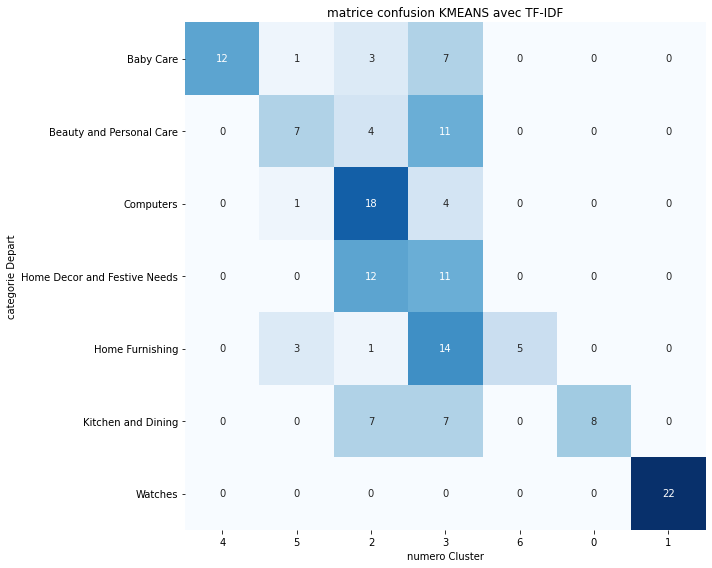

In [51]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 4, 5, 2, 3, 6, 0, 1])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion KMEANS avec TF-IDF')
plt.tight_layout()
plt.savefig('P01_05_confusionMatrix_tf-idf.jpg')
plt.show()

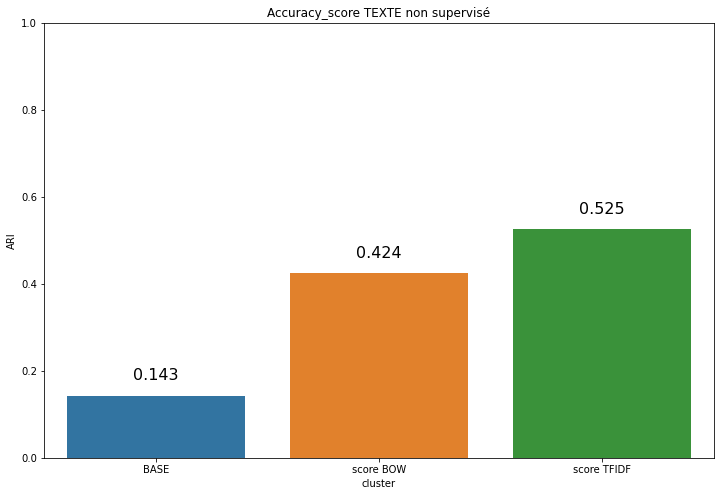

In [52]:
plt.figure(figsize=(12, 8))
chart = sns.barplot(x = ['BASE', 'score BOW', 'score TFIDF'], y = [0.143, accuracy_bow, accuracy_tf])
plt.title('Accuracy_score TEXTE non supervisé')
plt.xlabel('cluster')
plt.ylabel('ARI')
plt.ylim(0, 1)
#plt.xticks(rotation=90)
for p in chart.patches:
     chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=16, color='black', xytext=(0, 20),
         textcoords='offset points')
plt.savefig('P01_01_SCORE texte non supervise.jpg')
plt.show()

## PCA pour affichage 3D

In [53]:
from sklearn import manifold, decomposition

print("Dimensions tfidf avant réduction PCA : ", tf_idf.shape)
pca_tf = decomposition.PCA(n_components=3)
feat_pca_tf= pca_tf.fit_transform(tf_idf)
print("Dimensions tfidf après réduction PCA : ", feat_pca_tf.shape)

Dimensions tfidf avant réduction PCA :  (1050, 26055)
Dimensions tfidf après réduction PCA :  (1050, 3)


In [54]:
print(pca_tf.explained_variance_ratio_.sum())

0.04877508547204961


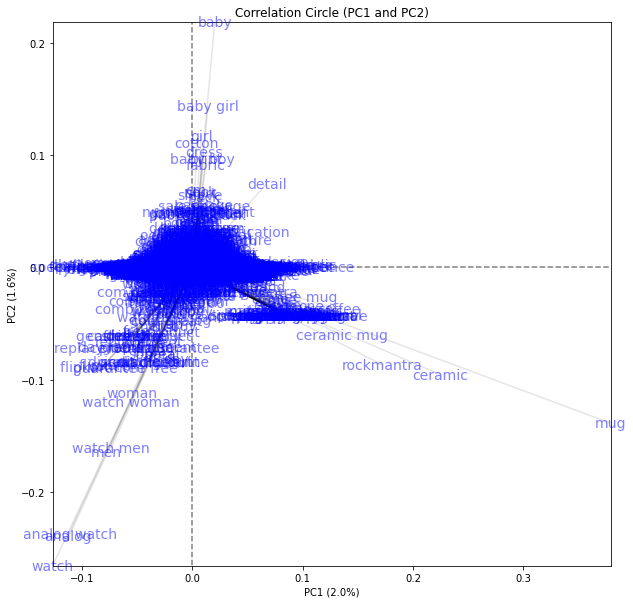

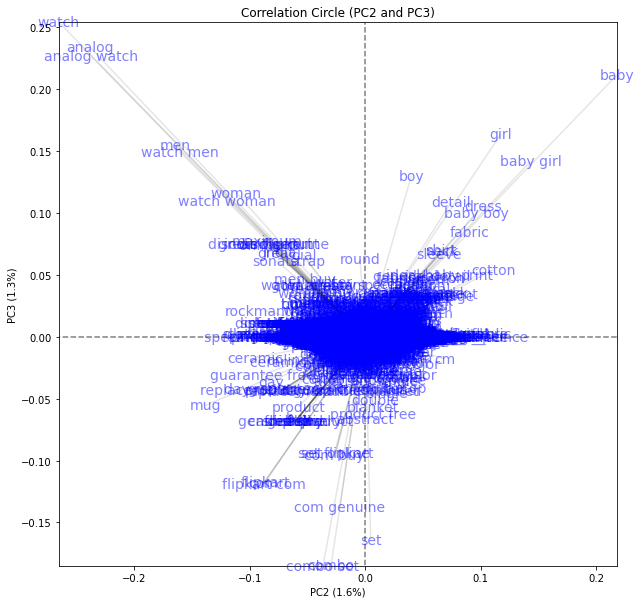

In [117]:
# Generate a correlation circle
pcs = pca_tf.components_ 
display_circles(pcs, 3, pca_tf, [(0, 1)], labels = np.array(tf_idf.columns.tolist()),)
display_circles(pcs, 3, pca_tf, [(1, 2)], labels = np.array(tf_idf.columns.tolist()),)

In [55]:
from sklearn import manifold, decomposition

print("Dimensions bow avant réduction PCA : ", bow.shape)
pca_bow = decomposition.PCA(n_components=3)
feat_pca_bow= pca_bow.fit_transform(bow)
print("Dimensions bow après réduction PCA : ", feat_pca_bow.shape)

Dimensions bow avant réduction PCA :  (1050, 26131)
Dimensions bow après réduction PCA :  (1050, 3)


In [56]:
print(pca_bow.explained_variance_ratio_.sum())

0.12335128063342354


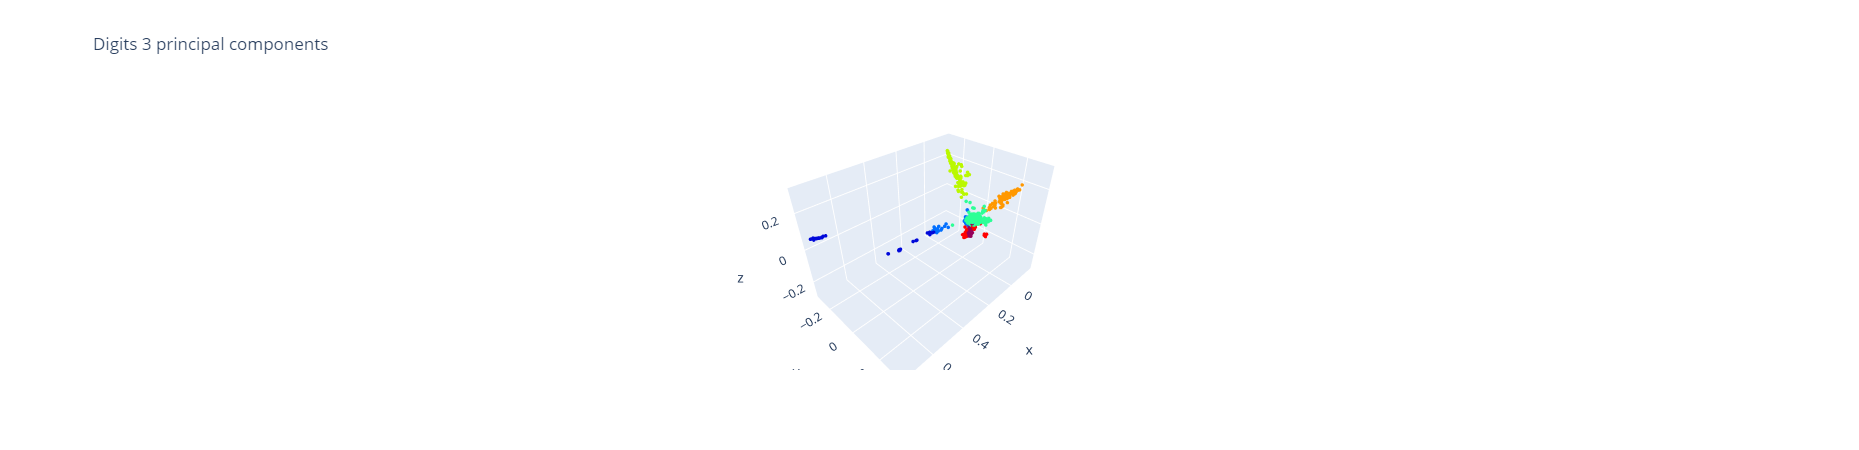

In [57]:
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

scatter = {
    'mode':"markers",
    'name': "y",
    'type': "scatter3d",    
    'x': feat_pca_tf[:,0], 
    'y': feat_pca_tf[:,1], 
    'z': feat_pca_tf[:,2],
    'marker': {'size':2, 'color':km_tf.predict(tf_idf), 'colorscale':'Rainbow'}
}
fig = {'data':[scatter], 'layout': {'title':"Digits 3 principal components"}}
py.iplot(fig)

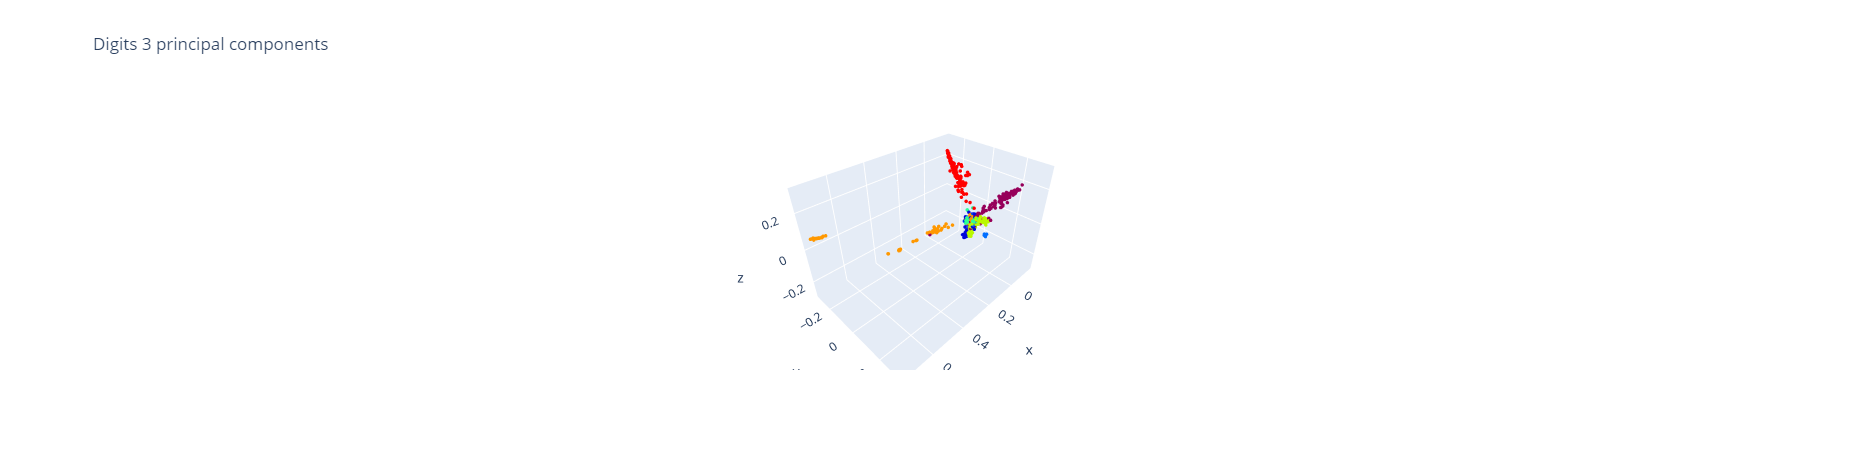

In [58]:
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

scatter = {
    'mode':"markers",
    'name': "y",
    'type': "scatter3d",    
    'x': feat_pca_tf[:,0], 
    'y': feat_pca_tf[:,1], 
    'z': feat_pca_tf[:,2],
    'marker': {'size':2, 'color':df.category_label, 'colorscale':'Rainbow'}
}
fig = {'data':[scatter], 'layout': {'title':"Digits 3 principal components"}}
py.iplot(fig)

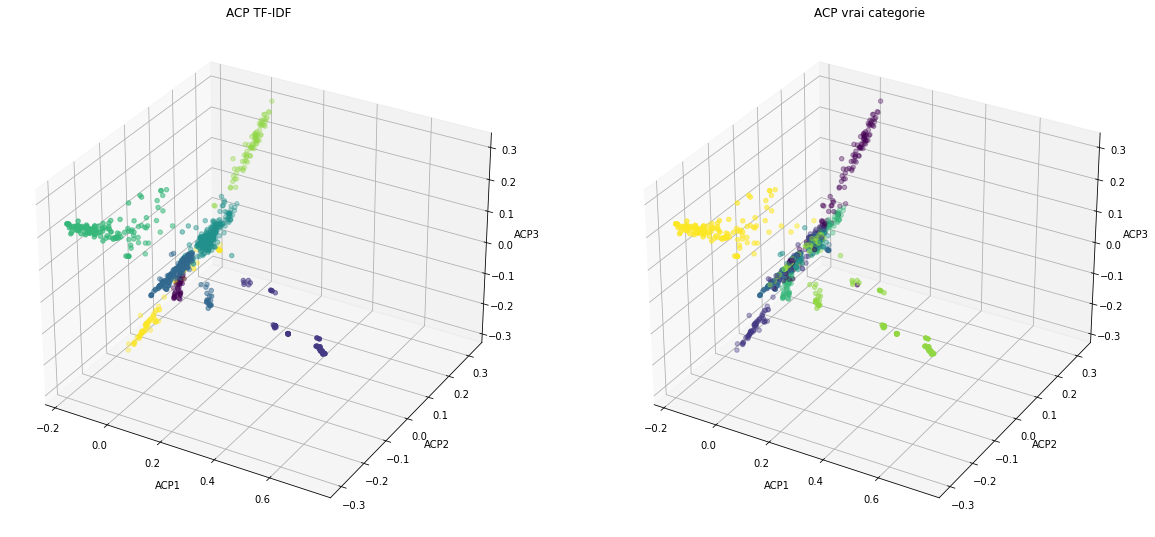

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(feat_pca_tf[:,0], feat_pca_tf[:,1], feat_pca_tf[:,2], c = km_tf.predict(tf_idf))
ax1.set_title("ACP TF-IDF ")
ax1.set_xlabel("ACP1")
ax1.set_ylabel("ACP2")
ax1.set_zlabel("ACP3")
#ax.legend(loc="best")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(feat_pca_tf[:,0], feat_pca_tf[:,1], feat_pca_tf[:,2], c = df.category_label)
ax2.set_title("ACP vrai categorie")
ax2.set_xlabel("ACP1")
ax2.set_ylabel("ACP2")
ax2.set_zlabel("ACP3")

plt.savefig('P01_02_ACP3D TF-IDF.jpg')
plt.show()

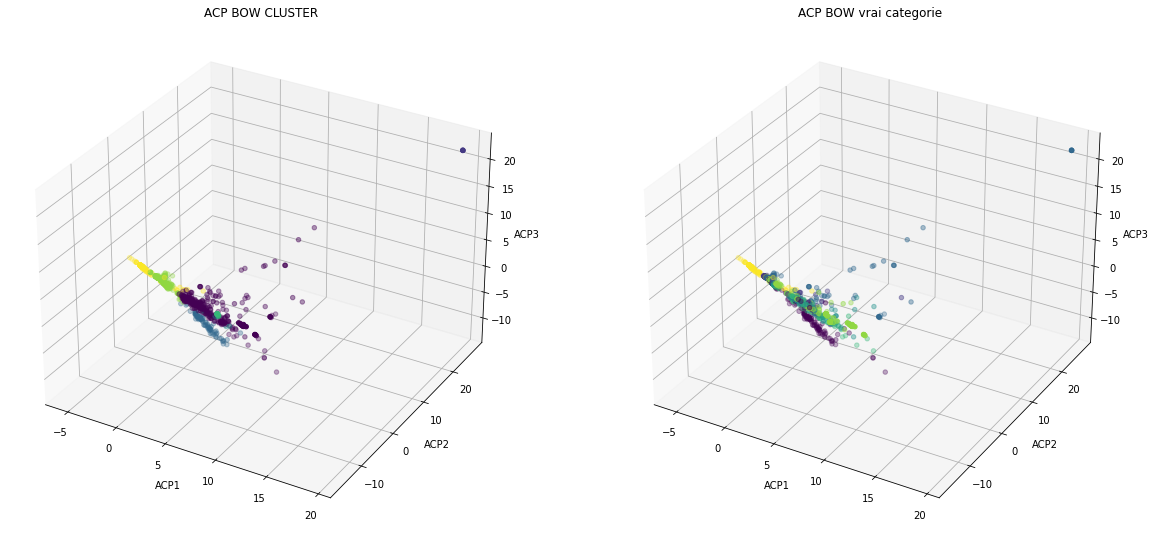

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(feat_pca_bow[:,0], feat_pca_bow[:,1], feat_pca_bow[:,2], c = km_bow.predict(bow))
ax1.set_title("ACP BOW CLUSTER")
ax1.set_xlabel("ACP1")
ax1.set_ylabel("ACP2")
ax1.set_zlabel("ACP3")
#ax.legend(loc="best")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(feat_pca_bow[:,0], feat_pca_bow[:,1], feat_pca_bow[:,2], c = df.category_label)
ax2.set_title("ACP BOW vrai categorie")
ax2.set_xlabel("ACP1")
ax2.set_ylabel("ACP2")
ax2.set_zlabel("ACP3")

plt.savefig('P01_03_ACP3D BOW.jpg')
plt.show()

# t-sne pour affichage 2D

In [62]:
from sklearn import manifold, decomposition

tsne_tf = manifold.TSNE(n_components=2, perplexity=50, 
                     n_iter=2000, init='random', random_state=1944)
X_tsne_tf = tsne_tf.fit_transform(tf_idf)

df_tsne_tf = pd.DataFrame(X_tsne_tf[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne_tf.shape)


(1050, 2)


In [63]:
tsne_bow = manifold.TSNE(n_components=2, perplexity=50, 
                     n_iter=2000, init='random', random_state=1944)
X_tsne_bow = tsne_bow.fit_transform(bow)

df_tsne_bow = pd.DataFrame(X_tsne_bow[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne_bow.shape)


(1050, 2)


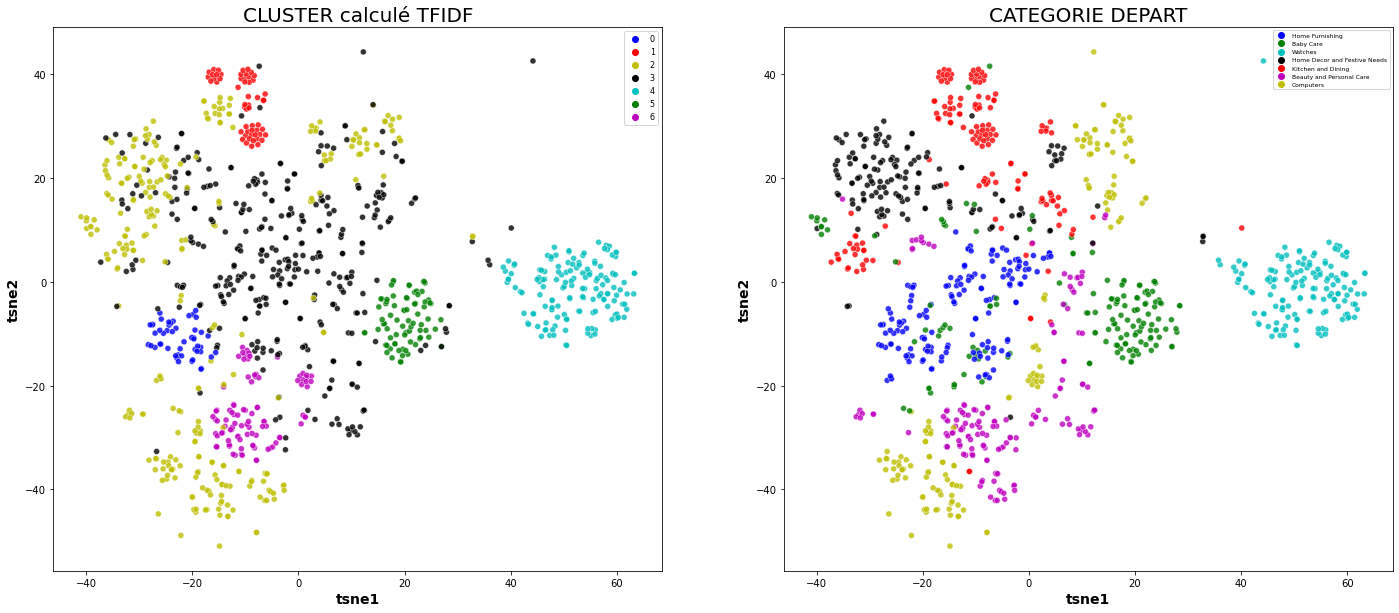

In [69]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
my_pal = {0: "b", 1: "r", 2:"y", 3: "k", 4: "c", 5:"g", 6:"m"}
sns.scatterplot(
    x="tsne1", y="tsne2", hue = km_tf.predict(tf_idf), data=df_tsne_tf, legend="brief", alpha=0.8, palette=my_pal)
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 8}) 
plt.title('CLUSTER calculé TFIDF', fontsize = 20)

plt.subplot(1,2,2)
my_pal = {"Baby Care": "g", "Home Furnishing": "b", "Beauty and Personal Care":"m", "Kitchen and Dining": "r", 
          "Computers": "y", "Watches":"c", "Home Decor and Festive Needs":"k"}
sns.scatterplot(
    x="tsne1", y="tsne2", hue = df.category, data=df_tsne_tf, legend="brief", alpha=0.8, palette=my_pal)

plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 6}) 
plt.title('CATEGORIE DEPART', fontsize = 20)

plt.savefig('P01_04_tsne_TFIDF.jpg')
plt.show()

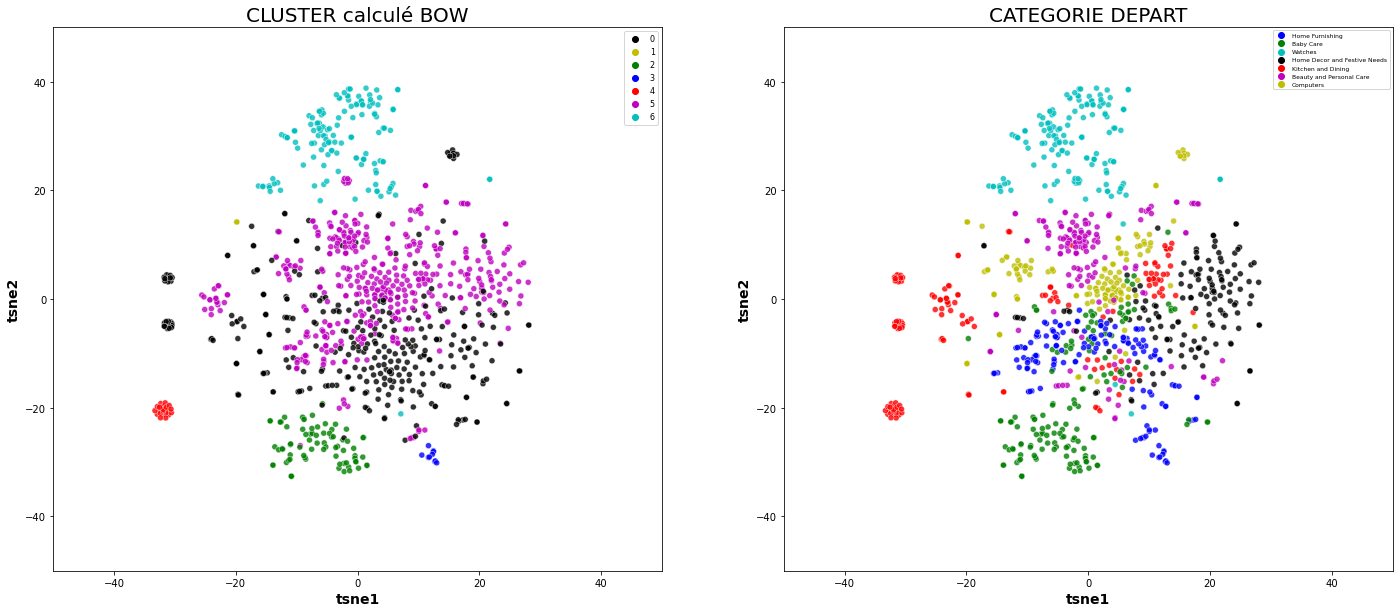

In [73]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
my_pal = {0: "k", 1: "y", 2:"g", 3: "b", 4: "r", 5:"m", 6:"c"}
sns.scatterplot(
    x="tsne1", y="tsne2", hue = km_bow.predict(bow), data=df_tsne_bow, legend="brief", alpha=0.8, palette=my_pal)
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.legend(prop={'size': 8}) 
plt.title('CLUSTER calculé BOW', fontsize = 20)

plt.subplot(1,2,2)
my_pal = {"Baby Care": "g", "Home Furnishing": "b", "Beauty and Personal Care":"m", "Kitchen and Dining": "r", 
          "Computers": "y", "Watches":"c", "Home Decor and Festive Needs":"k"}
sns.scatterplot(
    x="tsne1", y="tsne2", hue = df.category, data=df_tsne_bow, legend="brief", alpha=0.8, palette=my_pal)

plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.legend(prop={'size': 6}) 
plt.title('CATEGORIE DEPART', fontsize = 20)

plt.savefig('P01_04_tsne_BOW.jpg')

plt.show()

# SCORING

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

conf_mat = confusion_matrix(df.category_label, km_tf.predict(tf_idf))
print(conf_mat)

[[  3   1  21  39   0  77   9]
 [  0   0  32  52   0   0  66]
 [  0   0  99  40   0   0  11]
 [  0   0  76  74   0   0   0]
 [ 46   0   8  88   0   0   8]
 [  0  54  50  46   0   0   0]
 [  0   0   0   3 147   0   0]]


In [77]:
from sklearn.metrics import classification_report

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 4, 5, 2, 3, 6, 0, 1]
# produits    corresp = [0, 6, 4, 3, 5, 1, 2]
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(df.category_label, km_tf.predict(tf_idf))
conf_mat = confusion_matrix(df.category_label, cls_labels_transform)
print(conf_mat)
print()
print(classification_report(df.category_label, cls_labels_transform))

Correspondance des clusters calcul:  [4 5 2 4 6 0 1]
Correspondance des clusters :  [4, 5, 2, 3, 6, 0, 1]
[[ 77   9  21  39   3   1   0]
 [  0  66  32  52   0   0   0]
 [  0  11  99  40   0   0   0]
 [  0   0  76  74   0   0   0]
 [  0   8   8  88  46   0   0]
 [  0   0  50  46   0  54   0]
 [  0   0   0   3   0   0 147]]

              precision    recall  f1-score   support

           0       1.00      0.51      0.68       150
           1       0.70      0.44      0.54       150
           2       0.35      0.66      0.45       150
           3       0.22      0.49      0.30       150
           4       0.94      0.31      0.46       150
           5       0.98      0.36      0.53       150
           6       1.00      0.98      0.99       150

    accuracy                           0.54      1050
   macro avg       0.74      0.54      0.56      1050
weighted avg       0.74      0.54      0.56      1050



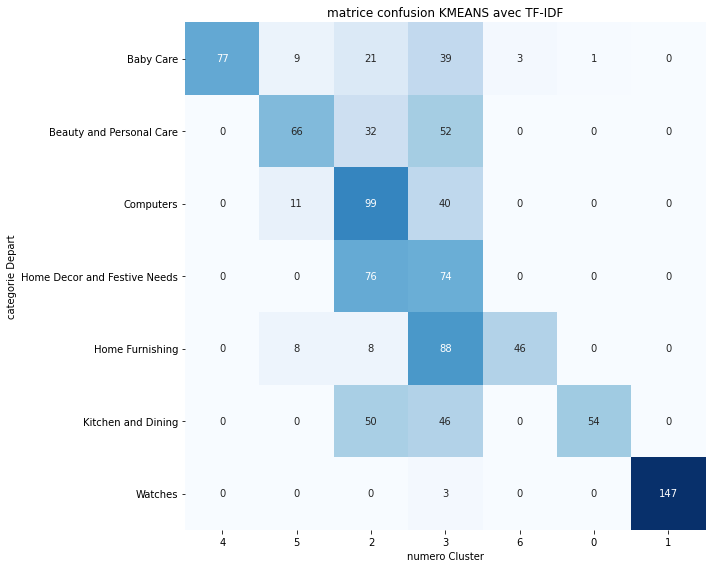

In [78]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 4, 5, 2, 3, 6, 0, 1])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion KMEANS avec TF-IDF')
plt.tight_layout()
#plt.savefig('P01_05_confusionMatrix_tf-idf.jpg')
plt.show()

In [80]:
dic_predic = {
        'prediction_watches' : ['BENYAR Mens Watches Analogue Quartz Chronograph Date 3ATM Waterproof Watch Business Sport Leather Strap Wrist Watch for Men'],
        'prediction_furnishing' : ['Classic Sofa Chairs Lazy Lounger Bean Bag Cover without Fillings for Home Garden Lounge Living Room'],
        'prediction_kitchen' : ['Premier Housewares 1900261 Clear Bin Bags For Recycling Storage Biodegradable Kitchen Bin Set Recycling Box Small Bin Bags Pack of 3 bags 31 x 30 x 44'],
        'prediction_computers' : ['Complete set of 21.5in Monitor and HP 800G1 Quad Core i5-4570 8GB 240GB SSD WiFi Windows 10 64-Bit Desktop PC Computer (Renewed)'],
        'prediction_festive' : ['Inventox Water Beads 20000 Pcs Multipurpose Magic Balls, Grow upto 15mm in Water, Ideal for Sensory Play, Home Decor, Vase Filler, Multi Color Set with 05 Balloons'],
        'prediction_beauty' : ['Garnier Ultimate Blends Hair Food Aloe 3-in-1, Moisturising Hair Mask, Conditioning Treatment, Leave-in Conditioner for Normal Hair, Vegan Formula, 98% Natural Ingredients, No Silicones, 390 ml'],
        'prediction_baby' : ['NimNik Baby Sling Wrap Carrier - Natural Cotton Multi Position Soft Sling for Newborns Infants from Birth Grey']
}


In [81]:
for key,elt in dic_predic.items():
    print(key, elt)
    print('cluster predit :',km_tf.predict(vect.transform(elt)))
    print()   

prediction_watches ['BENYAR Mens Watches Analogue Quartz Chronograph Date 3ATM Waterproof Watch Business Sport Leather Strap Wrist Watch for Men']
cluster predit : [4]

prediction_furnishing ['Classic Sofa Chairs Lazy Lounger Bean Bag Cover without Fillings for Home Garden Lounge Living Room']
cluster predit : [3]

prediction_kitchen ['Premier Housewares 1900261 Clear Bin Bags For Recycling Storage Biodegradable Kitchen Bin Set Recycling Box Small Bin Bags Pack of 3 bags 31 x 30 x 44']
cluster predit : [3]

prediction_computers ['Complete set of 21.5in Monitor and HP 800G1 Quad Core i5-4570 8GB 240GB SSD WiFi Windows 10 64-Bit Desktop PC Computer (Renewed)']
cluster predit : [3]

prediction_festive ['Inventox Water Beads 20000 Pcs Multipurpose Magic Balls, Grow upto 15mm in Water, Ideal for Sensory Play, Home Decor, Vase Filler, Multi Color Set with 05 Balloons']
cluster predit : [3]

prediction_beauty ['Garnier Ultimate Blends Hair Food Aloe 3-in-1, Moisturising Hair Mask, Conditionin

In [82]:
df_final = df[['category','category_label']].copy()

In [84]:
df_final[['cluster_tfidf']] =  km_tf.predict(tf_idf)

In [85]:
df_final

category  category_label  cluster_tfidf
0     Home Furnishing               4              3
1           Baby Care               0              3
2           Baby Care               0              3
3     Home Furnishing               4              3
4     Home Furnishing               4              3
...               ...             ...            ...
1045        Baby Care               0              3
1046        Baby Care               0              3
1047        Baby Care               0              2
1048        Baby Care               0              2
1049        Baby Care               0              2

[1050 rows x 3 columns]

# Essai apprentissage supervisé

peux t on utiliser les valeurs de categories pour entrainer un modèle supervisé

In [87]:
# on va diminuer les dimensions avant d'entrainer les modeles

from sklearn import manifold, decomposition

print("Dimensions tfidf avant réduction PCA : ", tf_idf_model.shape)
pca_tf = decomposition.PCA(n_components=0.99)
feat_pca_tf= pca_tf.fit_transform(tf_idf_model)
print("Dimensions tfidf après réduction PCA : ", feat_pca_tf.shape)

Dimensions tfidf avant réduction PCA :  (892, 26055)
Dimensions tfidf après réduction PCA :  (892, 818)


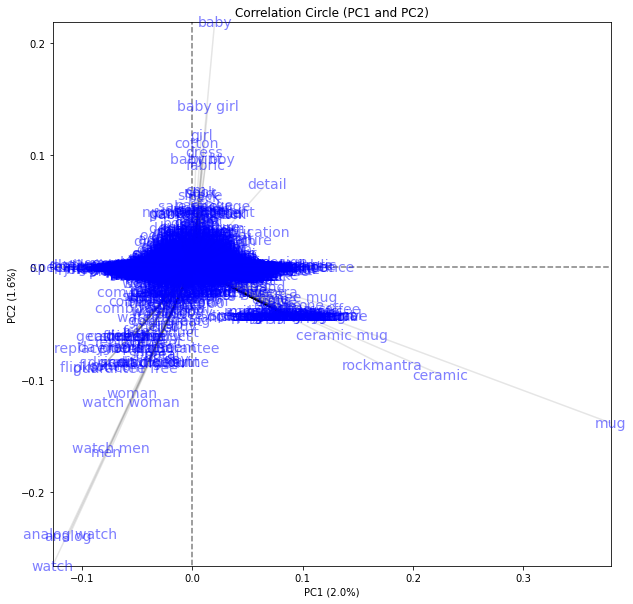

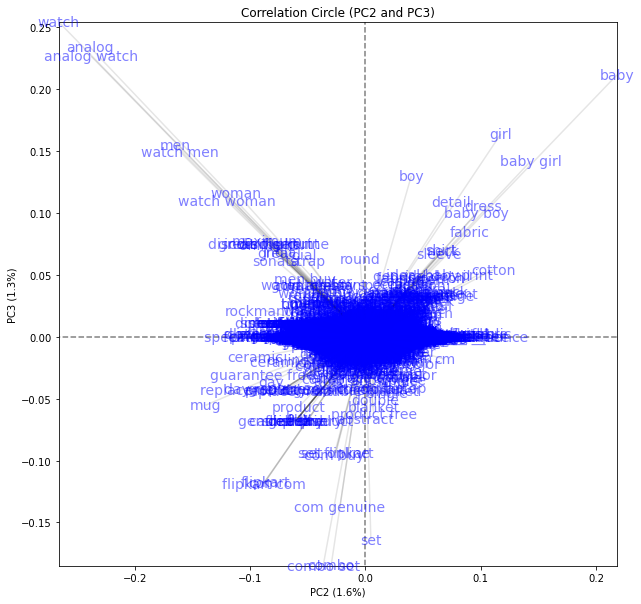

In [74]:
# Generate a correlation circle
pcs = pca_tf.components_ 
display_circles(pcs, 3, pca_tf, [(0, 1)], labels = np.array(tf_idf.columns.tolist()),)
display_circles(pcs, 3, pca_tf, [(1, 2)], labels = np.array(tf_idf.columns.tolist()),)

In [88]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(feat_pca_tf, df_model['category'], test_size=0.2, stratify=df_model['category'], random_state=1944)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

#oneVsAll OneVsRestClassifier
dectree = OneVsRestClassifier(DecisionTreeClassifier())

dectree.fit(Xtrain, ytrain)
dectree.score(Xtest, ytest)

0.8324022346368715

In [90]:
#oneVsone OneVsOneClassifier
dectree1 = OneVsOneClassifier(DecisionTreeClassifier())

dectree1.fit(Xtrain, ytrain)
dectree1.score(Xtest, ytest)

0.8379888268156425

In [92]:
from xgboost import XGBClassifier
xgb = OneVsRestClassifier(XGBClassifier())

xgb.fit(Xtrain, ytrain)
xgb.score(Xtest, ytest)

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:57:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.9664804469273743

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc = OneVsRestClassifier(RandomForestClassifier())

rfc.fit(Xtrain, ytrain)
rfc.score(Xtest, ytest)

0.9385474860335196

In [93]:
from sklearn.svm import SVC

svc_poly = SVC(kernel="poly", degree=2, coef0=1, C=5)

svc_poly.fit(Xtrain, ytrain)
print("SVM poly : ",svc_poly.score(Xtest, ytest))      

SVM poly :  0.9553072625698324


In [94]:
svc_rbf = SVC(kernel="rbf", gamma=0.01, C=500)
svc_rbf.fit(Xtrain, ytrain)
print("SVM RBF  : ",svc_rbf.score(Xtest, ytest))


SVM RBF  :  0.9608938547486033


## score avec SVM rbf : 0.961

In [98]:
svc_rbf_tf_svm = SVC(kernel="rbf", gamma=0.1, C=686)
svc_rbf_tf_svm.fit(Xtrain, ytrain)
print("SVM RBF  : ",svc_rbf.score(Xtest, ytest))


SVM RBF  :  0.9608938547486033


## prediction article amazon.co.uk

In [99]:
dic_predic = {
        'prediction_watches' : ['BENYAR Mens Watches Analogue Quartz Chronograph Date 3ATM Waterproof Watch Business Sport Leather Strap Wrist Watch for Men'],
        'prediction_furnishing' : ['Classic Sofa Chairs Lazy Lounger Bean Bag Cover without Fillings for Home Garden Lounge Living Room'],
        'prediction_kitchen' : ['Premier Housewares 1900261 Clear Bin Bags For Recycling Storage Biodegradable Kitchen Bin Set Recycling Box Small Bin Bags Pack of 3 bags 31 x 30 x 44'],
        'prediction_computers' : ['Complete set of 21.5in Monitor and HP 800G1 Quad Core i5-4570 8GB 240GB SSD WiFi Windows 10 64-Bit Desktop PC Computer (Renewed)'],
        'prediction_festive' : ['Inventox Water Beads 20000 Pcs Multipurpose Magic Balls, Grow upto 15mm in Water, Ideal for Sensory Play, Home Decor, Vase Filler, Multi Color Set with 05 Balloons'],
        'prediction_beauty' : ['Garnier Ultimate Blends Hair Food Aloe 3-in-1, Moisturising Hair Mask, Conditioning Treatment, Leave-in Conditioner for Normal Hair, Vegan Formula, 98% Natural Ingredients, No Silicones, 390 ml'],
        'prediction_baby' : ['NimNik Baby Sling Wrap Carrier - Natural Cotton Multi Position Soft Sling for Newborns Infants from Birth Grey']
}


In [100]:
for key,elt in dic_predic.items():
    print(key, elt)
    print('categorie predite :',svc_rbf.predict(pca_tf.transform(vect.transform(elt).todense())))
    print()   

prediction_watches ['BENYAR Mens Watches Analogue Quartz Chronograph Date 3ATM Waterproof Watch Business Sport Leather Strap Wrist Watch for Men']
categorie predite : ['Watches']

prediction_furnishing ['Classic Sofa Chairs Lazy Lounger Bean Bag Cover without Fillings for Home Garden Lounge Living Room']
categorie predite : ['Home Furnishing']

prediction_kitchen ['Premier Housewares 1900261 Clear Bin Bags For Recycling Storage Biodegradable Kitchen Bin Set Recycling Box Small Bin Bags Pack of 3 bags 31 x 30 x 44']
categorie predite : ['Kitchen and Dining']

prediction_computers ['Complete set of 21.5in Monitor and HP 800G1 Quad Core i5-4570 8GB 240GB SSD WiFi Windows 10 64-Bit Desktop PC Computer (Renewed)']
categorie predite : ['Computers']

prediction_festive ['Inventox Water Beads 20000 Pcs Multipurpose Magic Balls, Grow upto 15mm in Water, Ideal for Sensory Play, Home Decor, Vase Filler, Multi Color Set with 05 Balloons']
categorie predite : ['Home Decor and Festive Needs']

predi

In [101]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

svc_rbf_tf_svm.predict(pca_tf.transform(tf_idf))

array(['Home Furnishing', 'Baby Care', 'Baby Care', ..., 'Baby Care',
       'Baby Care', 'Baby Care'], dtype=object)

In [102]:
df_final[['cluster_tfidf_svm']] = svc_rbf_tf_svm.predict(pca_tf.transform(tf_idf))
df_final[['cluster_tfidf_svm_label']] = label_enc.transform(df_final['cluster_tfidf_svm'])

In [103]:
df_final

category  category_label  cluster_tfidf  \
0     Home Furnishing               4              3   
1           Baby Care               0              3   
2           Baby Care               0              3   
3     Home Furnishing               4              3   
4     Home Furnishing               4              3   
...               ...             ...            ...   
1045        Baby Care               0              3   
1046        Baby Care               0              3   
1047        Baby Care               0              2   
1048        Baby Care               0              2   
1049        Baby Care               0              2   

                 cluster_tfidf_svm  cluster_tfidf_svm_label  
0                  Home Furnishing                        4  
1                        Baby Care                        0  
2                        Baby Care                        0  
3                  Home Furnishing                        4  
4                  Home Furnishing                        4  
...                            ...                      ...  
1045                     Baby Care                        0  
1046  Home Decor and Festive Needs                        3  
1047                     Baby Care                        0  
1048                     Baby Care                        0  
1049                     Baby Care                        0  

[1050 rows x 5 columns]

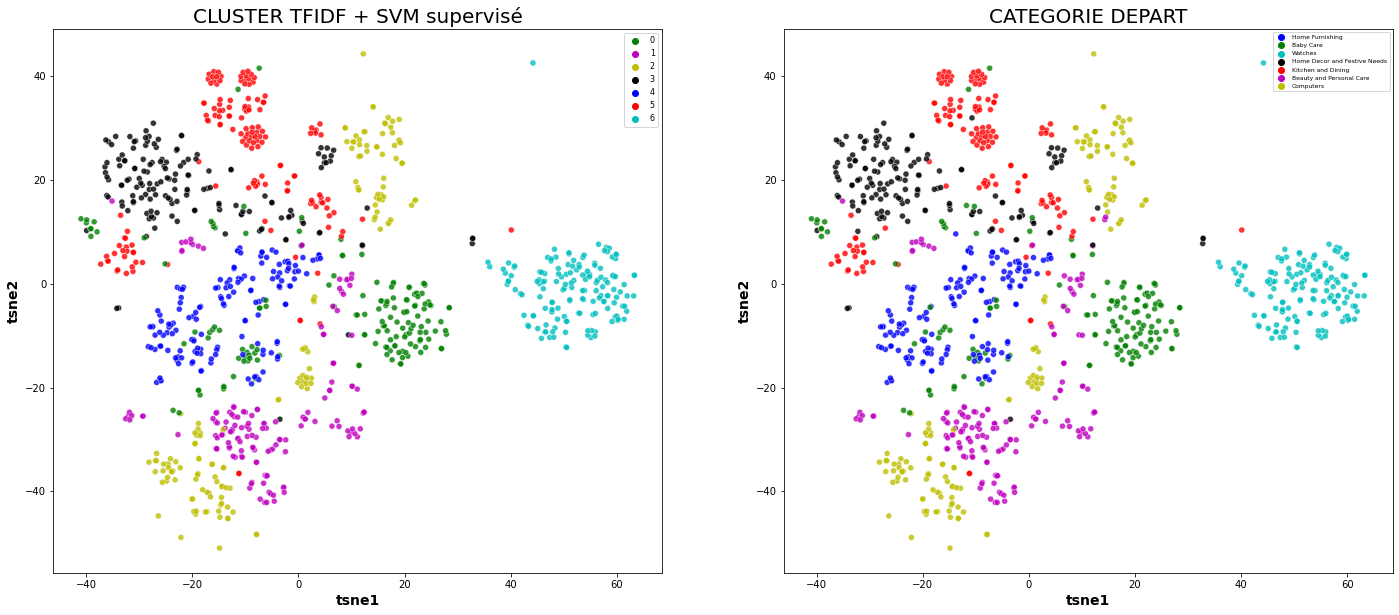

In [104]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
my_pal = {0: "g", 1: "m", 2:"y", 3: "k", 4: "b", 5:"r", 6:"c"}
sns.scatterplot(
    x="tsne1", y="tsne2", hue = df_final.cluster_tfidf_svm_label, data=df_tsne_tf, legend="brief", alpha=0.8, palette=my_pal)
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 8}) 
plt.title('CLUSTER TFIDF + SVM supervisé', fontsize = 20)

plt.subplot(1,2,2)
my_pal = {"Baby Care": "g", "Home Furnishing": "b", "Beauty and Personal Care":"m", "Kitchen and Dining": "r", 
          "Computers": "y", "Watches":"c", "Home Decor and Festive Needs":"k"}
sns.scatterplot(
    x="tsne1", y="tsne2", hue = df.category, data=df_tsne_tf, legend="brief", alpha=0.8, palette=my_pal)

plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 6}) 
plt.title('CATEGORIE DEPART', fontsize = 20)

plt.savefig('P01_04_tsne_TFIDF SVM supervise.jpg')
plt.show()

# matrice confusion supervise

In [107]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

accuracy_tf_supervise = accuracy_score(df_score['category_label'], label_enc.transform(svc_rbf.predict(pca_tf.transform(tf_idf_score))))
print("ACCURACY SCORE TF-IDF: {:.3}".format(accuracy_tf))
print()
conf_mat = confusion_matrix(df_score['category_label'], label_enc.transform(svc_rbf.predict(pca_tf.transform(tf_idf_score))))
print(conf_mat)
print()
print(classification_report(df_score['category_label'], label_enc.transform(svc_rbf.predict(pca_tf.transform(tf_idf_score)))))

ACCURACY SCORE TF-IDF: 0.918

[[21  0  0  0  2  0  0]
 [ 1 18  1  2  0  0  0]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0 22  0  1  0]
 [ 3  0  0  1 19  0  0]
 [ 0  0  0  2  0 20  0]
 [ 0  0  0  0  0  0 22]]

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       1.00      0.82      0.90        22
           2       0.96      1.00      0.98        23
           3       0.81      0.96      0.88        23
           4       0.90      0.83      0.86        23
           5       0.95      0.91      0.93        22
           6       1.00      1.00      1.00        22

    accuracy                           0.92       158
   macro avg       0.92      0.92      0.92       158
weighted avg       0.92      0.92      0.92       158



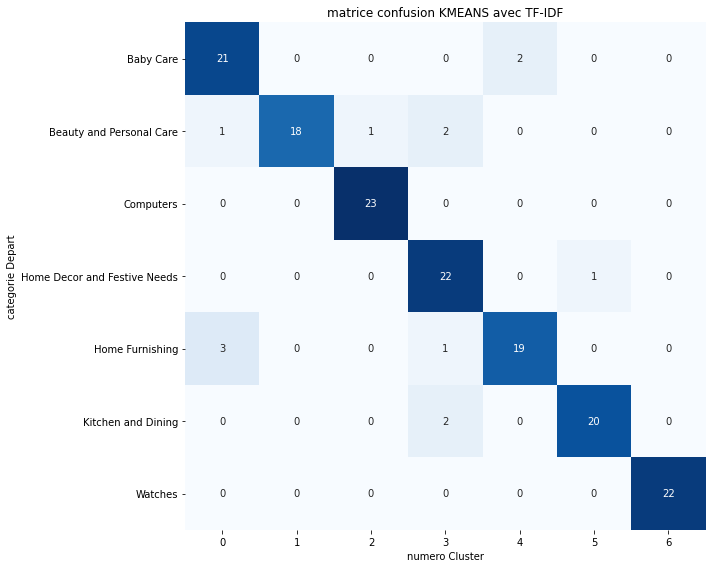

In [106]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 0, 1, 2, 3, 4, 5, 6])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion KMEANS avec TF-IDF')
plt.tight_layout()
plt.savefig('P01_06_confusionMatrix_tf-idf SVM.jpg')
plt.show()

# approche reseaux neurones

In [95]:
import keras

In [96]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(tf_idf, df.category, test_size=0.25, stratify=df.category, random_state=1944)

In [97]:
Xtrain.shape[1]

26077

In [98]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(Xtrain.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [99]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
from sklearn.preprocessing import OneHotEncoder

one_hot_ytrain = np.array(pd.get_dummies(ytrain))
one_hot_ytest = np.array(pd.get_dummies(ytest))
column_dum = pd.get_dummies(ytrain).columns

In [101]:
Xtrain_array = np.array(Xtrain)
Xtest_array = np.array(Xtest)

In [102]:
history = model.fit(Xtrain_array,
                    one_hot_ytrain,
                    epochs=10,
                    batch_size=150,
                    validation_data=(Xtest_array, one_hot_ytest))

Epoch 1/10
6/6 [==============================] - 0s 79ms/step - loss: 1.8894 - accuracy: 0.5489 - val_loss: 1.7567 - val_accuracy: 0.7757
Epoch 2/10
6/6 [==============================] - 0s 41ms/step - loss: 1.5995 - accuracy: 0.9644 - val_loss: 1.5311 - val_accuracy: 0.8289
Epoch 3/10
6/6 [==============================] - 0s 42ms/step - loss: 1.2793 - accuracy: 0.9962 - val_loss: 1.3286 - val_accuracy: 0.8783
Epoch 4/10
6/6 [==============================] - 0s 41ms/step - loss: 0.9921 - accuracy: 1.0000 - val_loss: 1.1521 - val_accuracy: 0.8821
Epoch 5/10
6/6 [==============================] - 0s 40ms/step - loss: 0.7506 - accuracy: 1.0000 - val_loss: 1.0006 - val_accuracy: 0.8935
Epoch 6/10
6/6 [==============================] - 0s 42ms/step - loss: 0.5541 - accuracy: 1.0000 - val_loss: 0.8786 - val_accuracy: 0.8935
Epoch 7/10
6/6 [==============================] - 0s 42ms/step - loss: 0.4026 - accuracy: 1.0000 - val_loss: 0.7732 - val_accuracy: 0.9125
Epoch 8/10
6/6 [===========

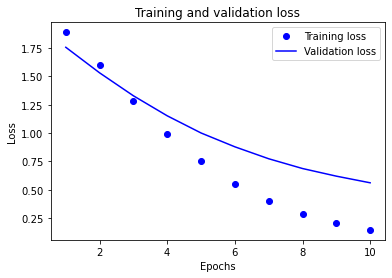

In [103]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

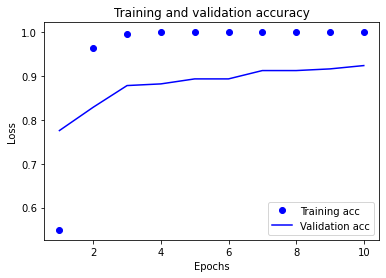

In [104]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

ypred = model.predict(Xtest_array)


In [106]:
ypred.shape

(263, 7)

In [107]:
ypred_argmax = []
for i,elt in enumerate(ypred):
    ypred_argmax.append(np.argmax(elt))
    

In [108]:
ytest_encode = label_enc.transform(ytest)

In [109]:
conf_mat = confusion_matrix(ytest_encode,ypred_argmax)
print(conf_mat)

[[30  0  0  3  5  0  0]
 [ 2 31  1  2  0  1  0]
 [ 0  0 38  0  0  0  0]
 [ 1  0  0 37  0  0  0]
 [ 1  0  0  0 36  1  0]
 [ 0  0  0  3  0 34  0]
 [ 0  0  0  0  0  0 37]]


<AxesSubplot:>

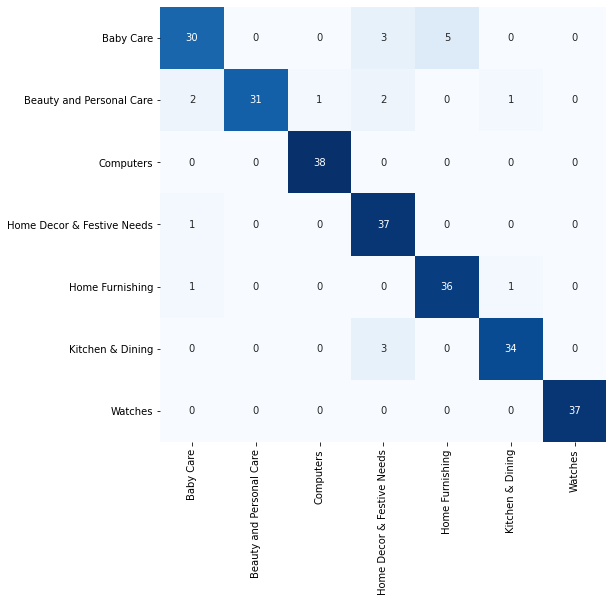

In [110]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = index_mat)
plt.figure(figsize = (8,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)

In [111]:
tfidf_prediction = vect.transform(['keyboard qwerty'])
#tfidf_prediction = vect.transform(['green watch'])
#tfidf_prediction = vect.transform(['cream shampoo'])
tfidf_prediction = vect.transform(['Garnier Ultimate Blends Hair Food Aloe 3-in-1, Moisturising Hair Mask, \
                                   Conditioning Treatment, Leave-in Conditioner for Normal Hair, Vegan Formula, 98% Natural Ingredients, No Silicones, 390 ml'])

In [112]:
column_dum[model.predict_classes(tfidf_prediction.todense())[0]]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'Beauty and Personal Care'

In [113]:
column_dum[np.argmax(model.predict(tfidf_prediction.todense()), axis=-1)[0]]

'Beauty and Personal Care'

In [114]:
dic_predic = {
        'prediction_watches' : ['BENYAR Mens Watches Analogue Quartz Chronograph Date 3ATM Waterproof Watch Business Sport Leather Strap Wrist Watch for Men'],
        'prediction_furnishing' : ['Classic Sofa Chairs Lazy Lounger Bean Bag Cover without Fillings for Home Garden Lounge Living Room'],
        'prediction_kitchen' : ['Premier Housewares 1900261 Clear Bin Bags For Recycling Storage Biodegradable Kitchen Bin Set Recycling Box Small Bin Bags Pack of 3 bags 31 x 30 x 44'],
        'prediction_computers' : ['Complete set of 21.5in Monitor and HP 800G1 Quad Core i5-4570 8GB 240GB SSD WiFi Windows 10 64-Bit Desktop PC Computer (Renewed)'],
        'prediction_festive' : ['Inventox Water Beads 20000 Pcs Multipurpose Magic Balls, Grow upto 15mm in Water, Ideal for Sensory Play, Home Decor, Vase Filler, Multi Color Set with 05 Balloons'],
        'prediction_beauty' : ['Garnier Ultimate Blends Hair Food Aloe 3-in-1, Moisturising Hair Mask, Conditioning Treatment, Leave-in Conditioner for Normal Hair, Vegan Formula, 98% Natural Ingredients, No Silicones, 390 ml'],
        'prediction_baby' : ['NimNik Baby Sling Wrap Carrier - Natural Cotton Multi Position Soft Sling for Newborns Infants from Birth Grey']
}


In [115]:
for key,elt in dic_predic.items():
    print(elt)
    tfidf_prediction = vect.transform(elt)
    print('categorie predite :',column_dum[np.argmax(model.predict(tfidf_prediction.todense()), axis=-1)[0]])
    print()   

['BENYAR Mens Watches Analogue Quartz Chronograph Date 3ATM Waterproof Watch Business Sport Leather Strap Wrist Watch for Men']
categorie predite : Watches

['Classic Sofa Chairs Lazy Lounger Bean Bag Cover without Fillings for Home Garden Lounge Living Room']
categorie predite : Home Furnishing

['Premier Housewares 1900261 Clear Bin Bags For Recycling Storage Biodegradable Kitchen Bin Set Recycling Box Small Bin Bags Pack of 3 bags 31 x 30 x 44']
categorie predite : Kitchen & Dining

['Complete set of 21.5in Monitor and HP 800G1 Quad Core i5-4570 8GB 240GB SSD WiFi Windows 10 64-Bit Desktop PC Computer (Renewed)']
categorie predite : Computers

['Inventox Water Beads 20000 Pcs Multipurpose Magic Balls, Grow upto 15mm in Water, Ideal for Sensory Play, Home Decor, Vase Filler, Multi Color Set with 05 Balloons']
categorie predite : Home Decor & Festive Needs

['Garnier Ultimate Blends Hair Food Aloe 3-in-1, Moisturising Hair Mask, Conditioning Treatment, Leave-in Conditioner for Normal 

# TRAITEMENT DES IMAGES

55b85ea15a1536d46b7190ad6fff8ce7.jpg


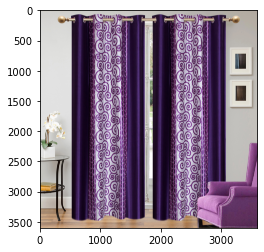

In [112]:
from matplotlib.image import imread

path = "Flipkart/Images/"
print(df.image.head()[0])
filename = path + df.image.head()[0]
image = imread(filename)
plt.imshow(image)
plt.show()

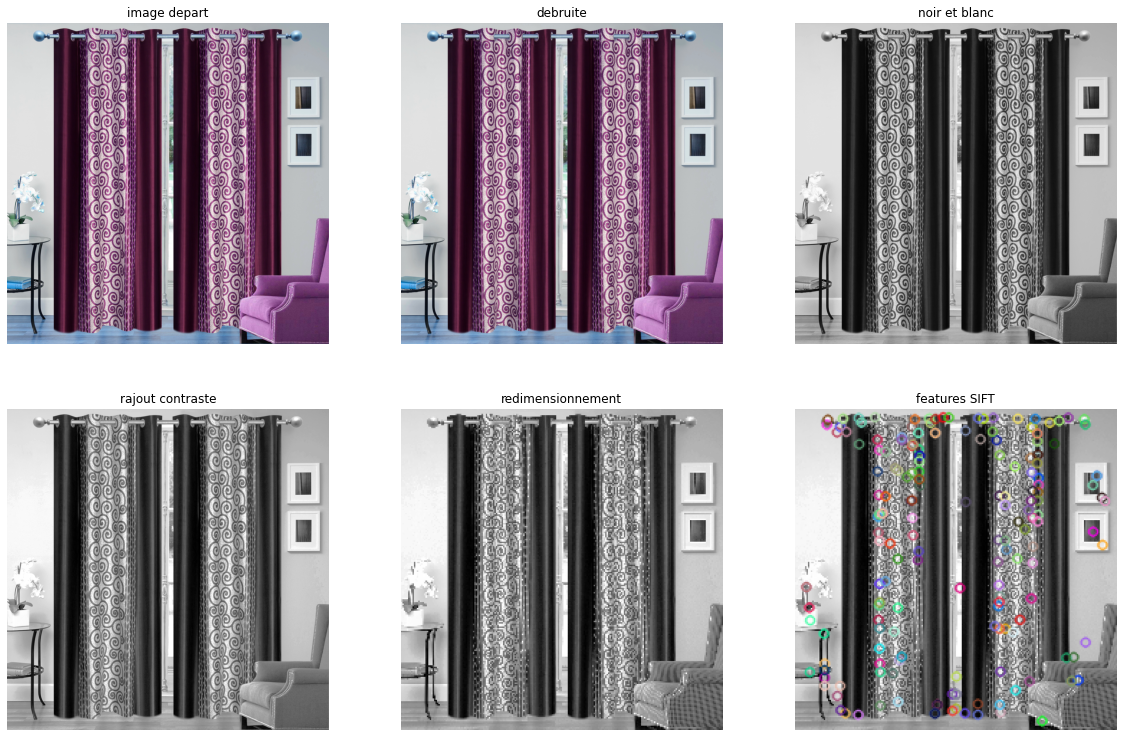

In [113]:
import cv2

path = "Flipkart/Images/"
filename = path + df.image.head()[0]

sift = cv2.xfeatures2d.SIFT_create(200)
image = cv2.imread(filename)

plt.figure(figsize=(20, 13))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#on enleve le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#on passe en noir et blanc
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation du contraste
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#on redimensionne pour normaliser entrée
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detecion feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_07_traitementImages.jpg')
plt.show()


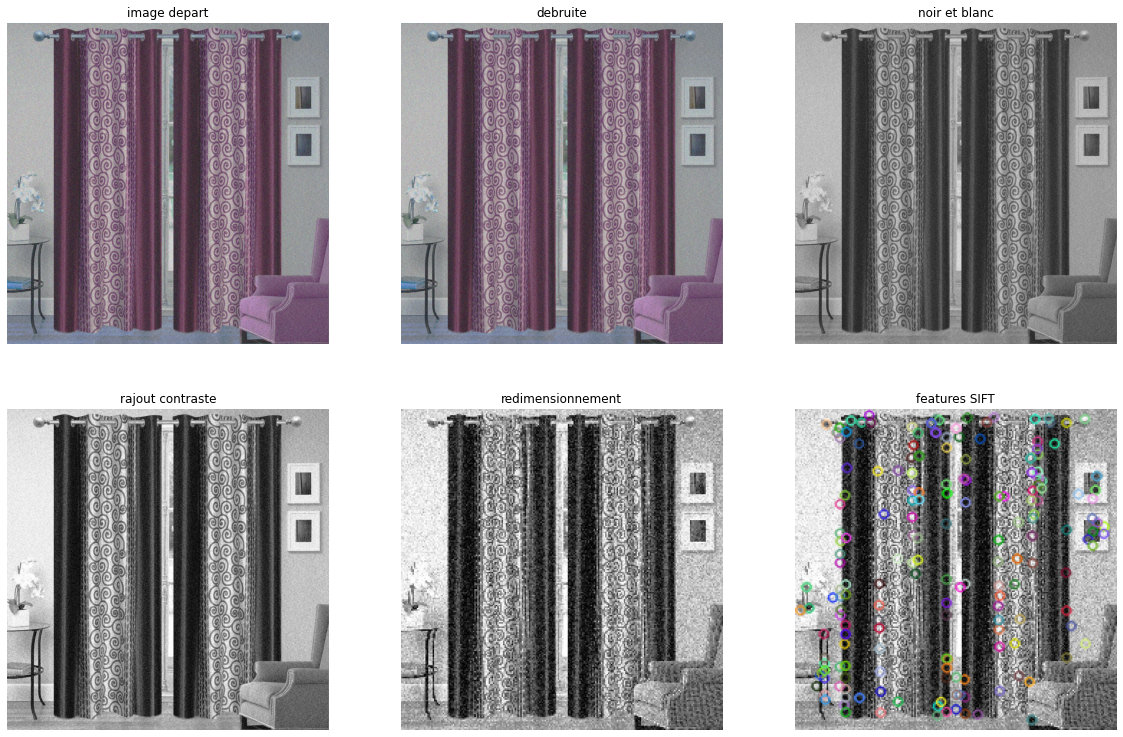

In [149]:
path = "Flipkart/testTraitement/"
filename = path + '55b85ea15a1536d46b7190ad6fff8ce7_noconraste_bruit.jpg'
image = imread(filename)

sift = cv2.xfeatures2d.SIFT_create(200)
image = cv2.imread(filename)

plt.figure(figsize=(20, 13))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#on enleve le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#on passe en noir et blanc
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation du contraste
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#on redimensionne pour normaliser entrée
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detecion feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_07_traitementImages_bruit_contraste.jpg')
plt.show()


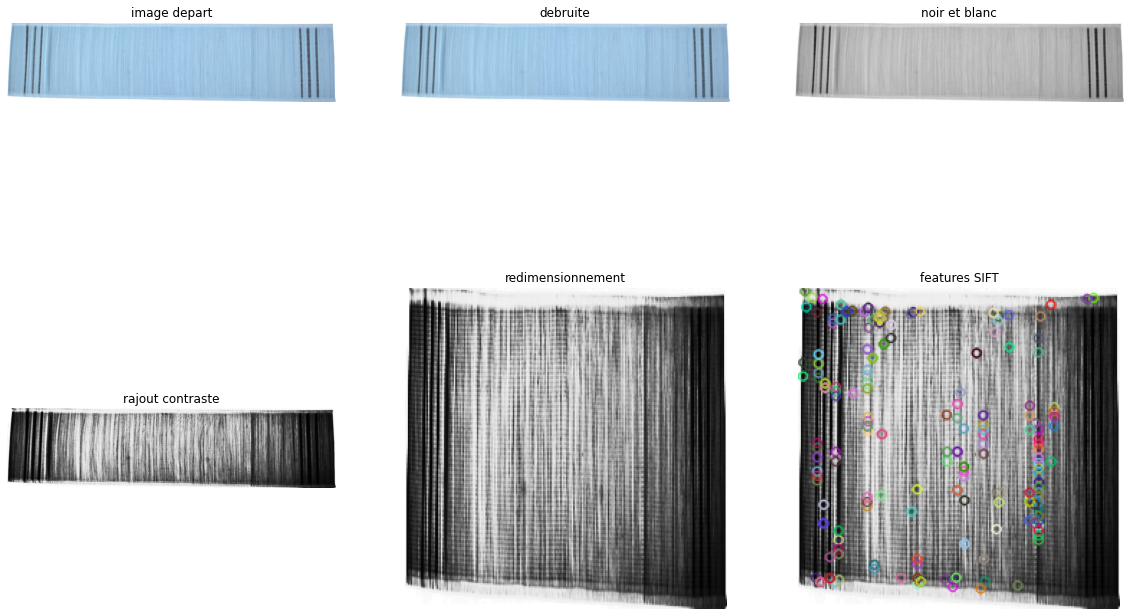

In [139]:
path = "Flipkart/Images/"
filename = path + '00cbbc837d340fa163d11e169fbdb952.jpg'
image = imread(filename)

sift = cv2.xfeatures2d.SIFT_create(200)
image = cv2.imread(filename)

plt.figure(figsize=(20, 13))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#on enleve le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#on passe en noir et blanc
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation du contraste
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#on redimensionne pour normaliser entrée
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detecion feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_08_traitementImages.jpg')
plt.show()


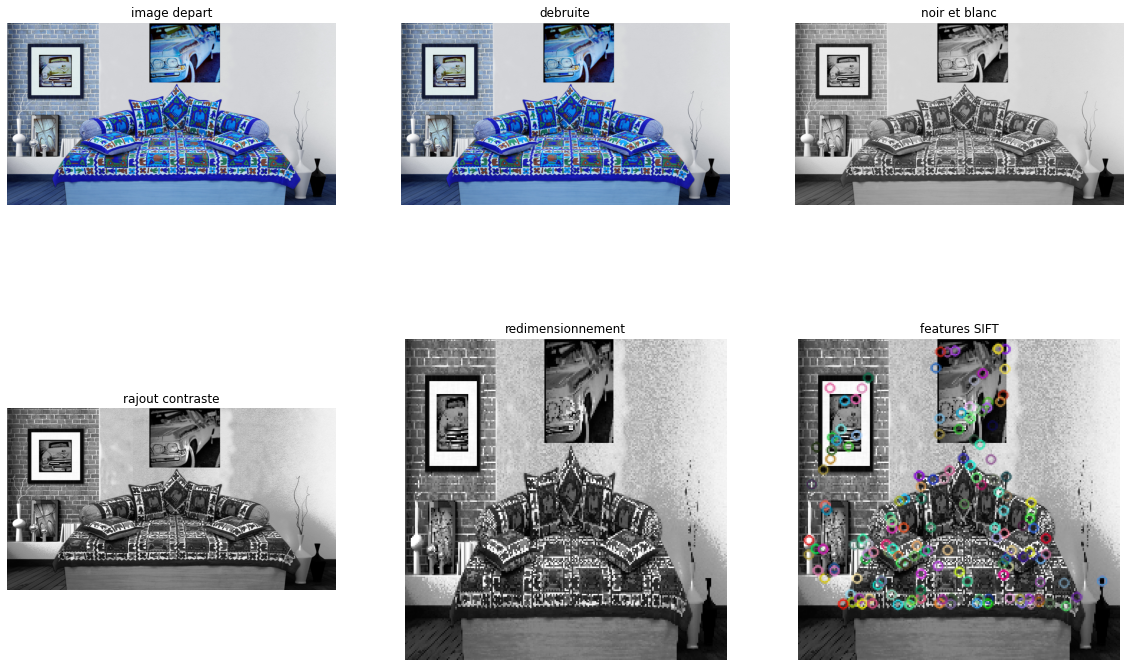

In [140]:
path = "Flipkart/Images/"
filename = path + '0a8a1e9c6659361c0c2b247f8a6471d0.jpg'
image = imread(filename)

sift = cv2.xfeatures2d.SIFT_create(200)
image = cv2.imread(filename)

plt.figure(figsize=(20, 13))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#on enleve le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#on passe en noir et blanc
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation du contraste
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#on redimensionne pour normaliser entrée
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detecion feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_09_traitementImages.jpg')
plt.show()


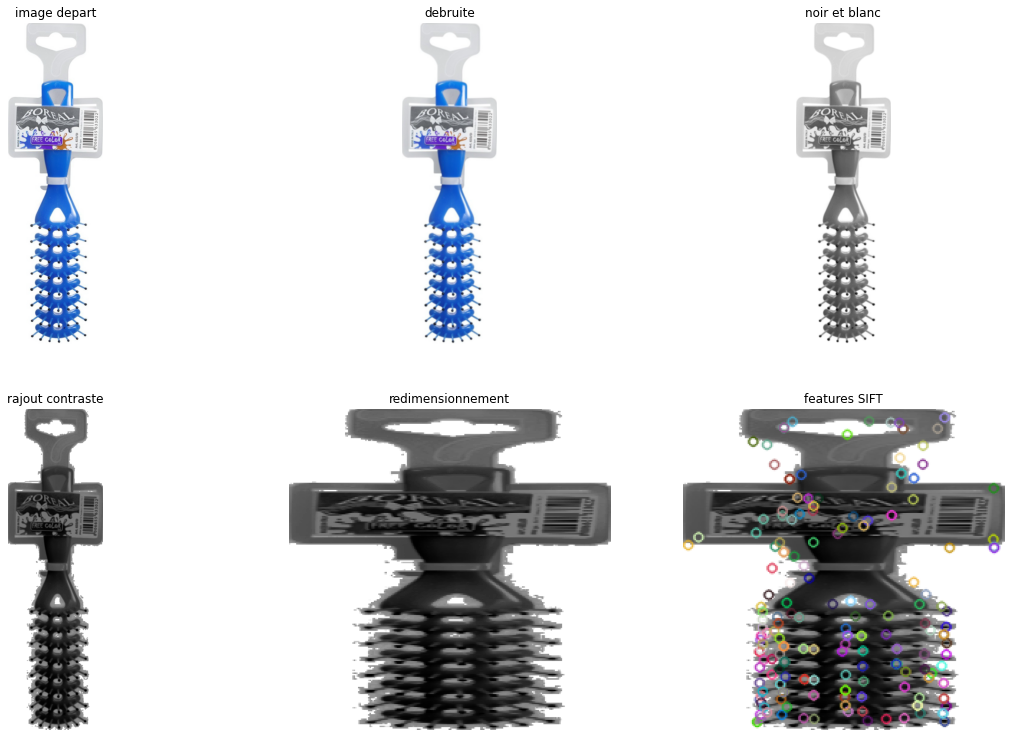

In [141]:
path = "Flipkart/Images/"
filename = path + '5ea8ddb8a5104c5d47c708e8a351e701.jpg'
image = imread(filename)

sift = cv2.xfeatures2d.SIFT_create(200)
image = cv2.imread(filename)

plt.figure(figsize=(20, 13))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#on enleve le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#on passe en noir et blanc
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation du contraste
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#on redimensionne pour normaliser entrée
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detecion feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_10_traitementImages.jpg')
plt.show()


## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [161]:
# identification of key points and associated descriptors
import time, cv2


list_photos =  df_model['image'].values.tolist()

sift_keypoints = []
orb_keypoints = []

temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)) :
    if image_num%25 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num])
    image = cv2.GaussianBlur(image, (5, 5), 0)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    equal_img = cv2.equalizeHist(gray_img)   # equalize image histogram
    dsize = (224, 224)
    resize_image = cv2.resize(equal_img, dsize)
    kp, des = sift.detectAndCompute(resize_image, None)
    sift_keypoints.append(des)
    kp, des = orb.detectAndCompute(resize_image, None)
    orb_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)
orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)


print()
print("Nombre de descripteurs SIFT : ", sift_keypoints_all.shape)
print("Nombre de descripteurs  ORB : ",  orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875

Nombre de descripteurs SIFT :  (295263, 128)
Nombre de descripteurs  ORB :  (325269, 32)
temps de traitement SIFT descriptor :            39.15 secondes


C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [162]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k_sift = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k_sift)
print("Création de",k_sift, "clusters de descripteurs ...")

# Clustering
kmeans_sift = cluster.MiniBatchKMeans(n_clusters=k_sift, init_size=3*k_sift, random_state=1972)
kmeans_sift.fit(sift_keypoints_all)

k_orb = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k_orb)
print("Création de",k_orb, "clusters de descripteurs ...")

kmeans_orb = cluster.MiniBatchKMeans(n_clusters=k_orb, init_size=3*k_orb, random_state=1972)
kmeans_orb.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  543
Création de 543 clusters de descripteurs ...


C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



Nombre de clusters estimés :  570
Création de 570 clusters de descripteurs ...


C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



temps de traitement kmeans :             5.61 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [163]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors_sift=[]
hist_vectors_orb=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%200 == 0 : print(i)  
    hist = build_histogram(kmeans_sift, image_desc, i) #calculates the histogram
    hist_vectors_sift.append(hist) #histogram is the feature vector

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%200 == 0 : print(i)  
    hist = build_histogram(kmeans_orb, image_desc, i) #calculates the histogram
    hist_vectors_orb.append(hist) #histogram is the feature vector

    
im_features_sift = np.asarray(hist_vectors_sift)
im_features_orb = np.asarray(hist_vectors_orb)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
200
400
600
800
0
200
400
600
800
temps de création histogrammes :             3.09 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [164]:
from sklearn import manifold, decomposition

print("Dimensions dataset SIFT avant réduction PCA : ", im_features_sift.shape)
pca_sift = decomposition.PCA(n_components=0.99)
feat_pca_sift = pca_sift.fit_transform(im_features_sift)
print("Dimensions dataset SIFT après réduction PCA : ", feat_pca_sift.shape)

print("Dimensions dataset  ORB avant réduction PCA : ", im_features_orb.shape)
pca_orb = decomposition.PCA(n_components=0.99)
feat_pca_orb = pca_orb.fit_transform(im_features_orb)
print("Dimensions dataset  ORB après réduction PCA : ", feat_pca_orb.shape)

Dimensions dataset SIFT avant réduction PCA :  (892, 543)
Dimensions dataset SIFT après réduction PCA :  (892, 272)
Dimensions dataset  ORB avant réduction PCA :  (892, 570)
Dimensions dataset  ORB après réduction PCA :  (892, 347)


In [165]:
from sklearn.cluster import KMeans

km_sift =  KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_sift.fit(feat_pca_sift)

km_orb =  KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_orb.fit(feat_pca_orb)


KMeans(n_clusters=7, random_state=0)

## score ARI SIFT 0.024

In [166]:
from sklearn.metrics.cluster import adjusted_rand_score

ari_tf = adjusted_rand_score(df_model['category_label'], km_sift.labels_)
ari_bow = adjusted_rand_score(df_model['category_label'], km_orb.labels_)

print(f'ARI BOW: {ari_bow:.3f}')
print(f'ARI TFIDF: {ari_tf:.3f}')


ARI BOW: 0.015
ARI TFIDF: 0.024


## accuracy score 

In [173]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

    
list_photos_score =  df_score['image'].values.tolist()

temps1=time.time()

predict_score = []
for image_num in range(len(list_photos_score)) :
    if image_num%25 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num])
    image = cv2.GaussianBlur(image, (5, 5), 0)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    equal_img = cv2.equalizeHist(gray_img)   # equalize image histogram
    dsize = (224, 224)
    resize_image = cv2.resize(equal_img, dsize)
    kp, des = sift.detectAndCompute(resize_image, None)
    hist = build_histogram(kmeans_sift, des, 0) #calculates the histogram
    feat_pca = pca_sift.transform(hist.reshape(1,-1))
#    predi = label_enc.inverse_transform(km_sift.predict(feat_pca))
    predict_score.append(km_sift.predict(feat_pca)[0])
    
print()

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor JEU SCORE: ", "%15.2f" % duration1, "secondes")    
#plt.savefig('P01_14_VGG16 amazon.jpg')
plt.show()

0
25
50
75
100
125
150

temps de traitement SIFT descriptor JEU SCORE:             6.13 secondes


In [174]:
conf_mat = confusion_matrix(df_score['category_label'], predict_score)
print(conf_mat)


[[ 0  4  6  0  0  1 12]
 [ 0  3  8  0  0  2  9]
 [ 0  6  3  0  0  1 13]
 [ 0  6  2  0  0  0 15]
 [ 0  5  1  0  0  0 17]
 [ 0  6  4  2  0  0 10]
 [ 0  3  2  0  0  2 15]]


In [176]:
from sklearn.metrics import classification_report

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 2, 5, 1, 3, 6, 0, 4]
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(df.iloc[index_score,:]['category_label'], predict_score)
conf_mat = confusion_matrix(df.iloc[index_score,:]['category_label'], cls_labels_transform)
print(conf_mat)

accuracy_image_sift = accuracy_score(df.iloc[index_score,:]['category_label'], cls_labels_transform)
print()
print("ACCURACY SCORE SIFT: {:.3}".format(accuracy_image_sift))
print()

print()
print(classification_report(df.iloc[index_score,:]['category_label'], cls_labels_transform))

Correspondance des clusters calcul:  [0 2 1 5 0 1 4]
Correspondance des clusters :  [2, 5, 1, 3, 6, 0, 4]
[[ 1  6  0  0 12  4  0]
 [ 2  8  0  0  9  3  0]
 [ 1  3  0  0 13  6  0]
 [ 0  2  0  0 15  6  0]
 [ 0  1  0  0 17  5  0]
 [ 0  4  0  2 10  6  0]
 [ 2  2  0  0 15  3  0]]

ACCURACY SCORE SIFT: 0.203


              precision    recall  f1-score   support

           0       0.17      0.04      0.07        23
           1       0.31      0.36      0.33        22
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        23
           4       0.19      0.74      0.30        23
           5       0.18      0.27      0.22        22
           6       0.00      0.00      0.00        22

    accuracy                           0.20       158
   macro avg       0.12      0.20      0.13       158
weighted avg       0.12      0.20      0.13       158



C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



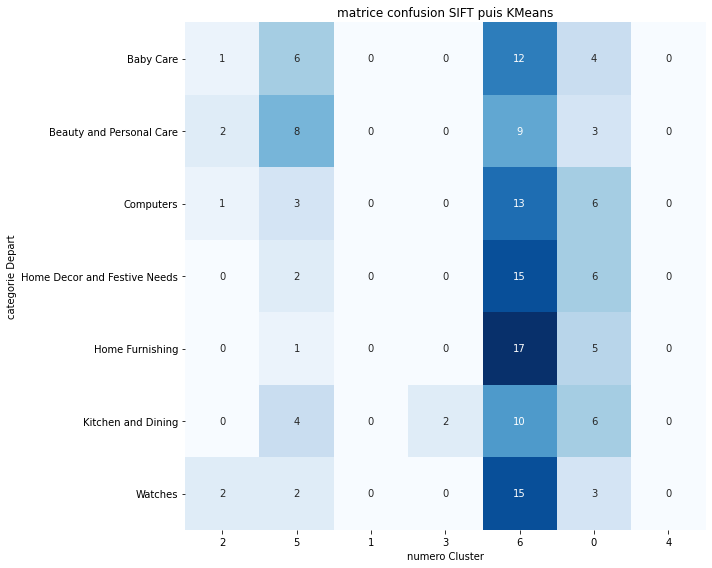

In [177]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 2, 5, 1, 3, 6, 0, 4])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion SIFT puis KMeans')
plt.tight_layout()
plt.savefig('P01_21_confusionMatrix_sift.jpg')
plt.show()

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [178]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=1944)

X_tsne_sift = tsne.fit_transform(feat_pca_sift)
df_tsne_sift = pd.DataFrame(X_tsne_sift[:,0:2], columns=['tsne1', 'tsne2'])
print(X_tsne_sift.shape)

X_tsne_orb = tsne.fit_transform(feat_pca_orb)
df_tsne_orb = pd.DataFrame(X_tsne_orb[:,0:2], columns=['tsne1', 'tsne2'])
print(X_tsne_orb.shape)


(892, 2)
(892, 2)


In [179]:
df_tsne_sift['category'] = df_model['category']
df_tsne_orb['category'] = df_model['category']


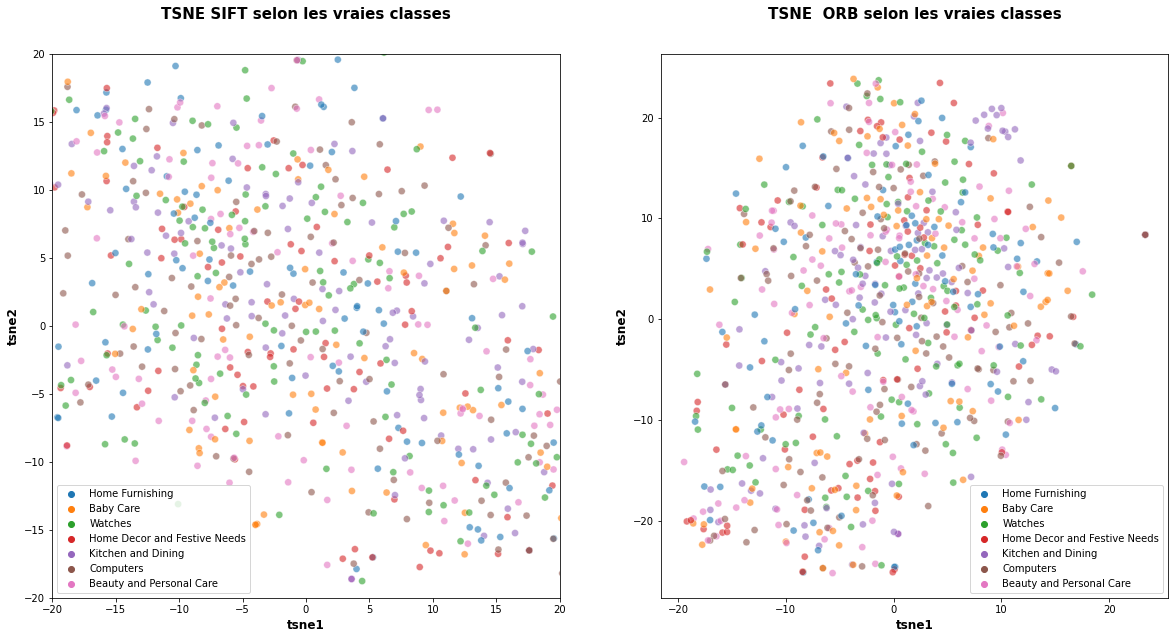

In [180]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(   x="tsne1", y="tsne2", data=df_tsne_sift, legend="brief", hue='category', s=50, alpha=0.6)
plt.title('TSNE SIFT selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 12, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 12, fontweight = 'bold')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.legend(prop={'size': 10}) 

plt.subplot(1,2,2)
sns.scatterplot(   x="tsne1", y="tsne2", data=df_tsne_orb, legend="brief", hue='category', s=50, alpha=0.6)
plt.title('TSNE  ORB selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 12, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 12, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()


# test supervisé

In [181]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(feat_pca_sift, df_model['category'], test_size=0.15, stratify=df_model['category'], random_state=1944)

In [182]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel="rbf", gamma=.01, C=50000)
svc_rbf.fit(Xtrain, ytrain)
print("SVM RBF  : ",svc_rbf.score(Xtest, ytest))


SVM RBF  :  0.417910447761194


In [183]:
svc_poly = SVC(kernel="poly", degree=3, coef0=1, C=5)

svc_poly.fit(Xtrain, ytrain)
print("SVM poly : ",svc_poly.score(Xtest, ytest))      

SVM poly :  0.4552238805970149


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rfc = OneVsRestClassifier(RandomForestClassifier())

rfc.fit(Xtrain, ytrain)
rfc.score(Xtest, ytest)

0.30597014925373134

In [185]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'degree': np.arange(2, 7),
               'C': np.logspace(-1, 3)}

print(random_grid)

svc_poly = SVC(kernel="poly", coef0=1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svc_random = RandomizedSearchCV(estimator = svc_poly, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
svc_random.fit(Xtrain, ytrain)

print(svc_random.best_score_)
print(svc_random.best_params_)

{'degree': array([2, 3, 4, 5, 6]), 'C': array([1.00000000e-01, 1.20679264e-01, 1.45634848e-01, 1.75751062e-01,
       2.12095089e-01, 2.55954792e-01, 3.08884360e-01, 3.72759372e-01,
       4.49843267e-01, 5.42867544e-01, 6.55128557e-01, 7.90604321e-01,
       9.54095476e-01, 1.15139540e+00, 1.38949549e+00, 1.67683294e+00,
       2.02358965e+00, 2.44205309e+00, 2.94705170e+00, 3.55648031e+00,
       4.29193426e+00, 5.17947468e+00, 6.25055193e+00, 7.54312006e+00,
       9.10298178e+00, 1.09854114e+01, 1.32571137e+01, 1.59985872e+01,
       1.93069773e+01, 2.32995181e+01, 2.81176870e+01, 3.39322177e+01,
       4.09491506e+01, 4.94171336e+01, 5.96362332e+01, 7.19685673e+01,
       8.68511374e+01, 1.04811313e+02, 1.26485522e+02, 1.52641797e+02,
       1.84206997e+02, 2.22299648e+02, 2.68269580e+02, 3.23745754e+02,
       3.90693994e+02, 4.71486636e+02, 5.68986603e+02, 6.86648845e+02,
       8.28642773e+02, 1.00000000e+03])}
Fitting 3 folds for each of 50 candidates, totalling 150 fits
0.467

## Accuracy score avec SVM ploy

In [186]:
svc_poly = SVC(kernel="poly", degree=4, coef0=1, C=0.256)

svc_poly.fit(Xtrain, ytrain)
print("SVM poly : ",svc_poly.score(Xtest, ytest))   

SVM poly :  0.4701492537313433


In [187]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

    
list_photos_score =  df_score['image'].values.tolist()

temps1=time.time()

predict_score = []
for image_num in range(len(list_photos_score)) :
    if image_num%25 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num])
    image = cv2.GaussianBlur(image, (5, 5), 0)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    equal_img = cv2.equalizeHist(gray_img)   # equalize image histogram
    dsize = (224, 224)
    resize_image = cv2.resize(equal_img, dsize)
    kp, des = sift.detectAndCompute(resize_image, None)
    hist = build_histogram(kmeans_sift, des, 0) #calculates the histogram
    feat_pca = pca_sift.transform(hist.reshape(1,-1))
#    predi = label_enc.inverse_transform(km_sift.predict(feat_pca))
    predict_score.append(svc_poly.predict(feat_pca)[0])
    
print()

duration1=time.time()-temps1
print("temps de traitement SIFT supervise descriptor JEU SCORE: ", "%15.2f" % duration1, "secondes")    
#plt.savefig('P01_14_VGG16 amazon.jpg')
plt.show()

0
25
50
75
100
125
150

temps de traitement SIFT supervise descriptor JEU SCORE:             6.07 secondes


In [188]:
predict_score = label_enc.transform(predict_score)

In [189]:
conf_mat = confusion_matrix(df_score['category_label'], predict_score)
print(conf_mat)


[[ 0  2  0  8  0 11  2]
 [ 3  4  2  0  1  9  3]
 [ 1  4  1  1  4 11  1]
 [ 2  1  1  4  4  5  6]
 [ 1  1  1  3  1 13  3]
 [ 4  0  0  2  4  2 10]
 [ 4  4  0 10  1  3  0]]


In [195]:
from sklearn.metrics import classification_report

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 1, 3, 0, 6, 2, 4, 5]
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(df_score['category_label'], predict_score)
conf_mat = confusion_matrix(df_score['category_label'], cls_labels_transform)
print(conf_mat)

accuracy_image_sift_svm = accuracy_score(df_score['category_label'], cls_labels_transform)
print()
print("ACCURACY SCORE SIFT: {:.3}".format(accuracy_image_sift_svm))
print()

print()
print(classification_report(df_score['category_label'], cls_labels_transform))

Correspondance des clusters calcul:  [5 1 1 6 2 4 5]
Correspondance des clusters :  [1, 3, 0, 6, 2, 4, 5]
[[ 0  0  0  2 11  2  8]
 [ 2  3  1  4  9  3  0]
 [ 1  1  4  4 11  1  1]
 [ 1  2  4  1  5  6  4]
 [ 1  1  1  1 13  3  3]
 [ 0  4  4  0  2 10  2]
 [ 0  4  1  4  3  0 10]]

ACCURACY SCORE SIFT: 0.259


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.20      0.14      0.16        22
           2       0.27      0.17      0.21        23
           3       0.06      0.04      0.05        23
           4       0.24      0.57      0.34        23
           5       0.40      0.45      0.43        22
           6       0.36      0.45      0.40        22

    accuracy                           0.26       158
   macro avg       0.22      0.26      0.23       158
weighted avg       0.22      0.26      0.22       158



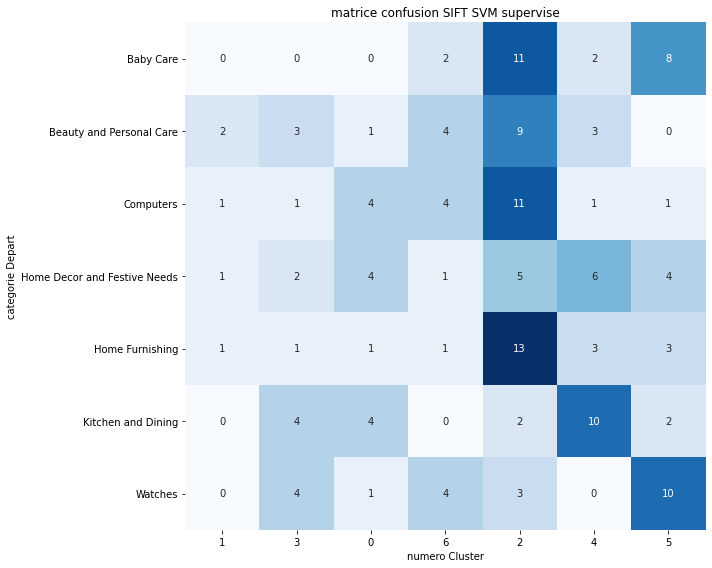

In [196]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 1, 3, 0, 6, 2, 4, 5])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion SIFT SVM supervise')
plt.tight_layout()
plt.savefig('P01_22_confusionMatrix_sift_svm.jpg')
plt.show()

In [197]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

    
list_photos =  df.image.values.tolist()

temps1=time.time()

predict_sift = []
predict_sift_svm = []
for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num])
    image = cv2.GaussianBlur(image, (5, 5), 0)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    equal_img = cv2.equalizeHist(gray_img)   # equalize image histogram
    dsize = (224, 224)
    resize_image = cv2.resize(equal_img, dsize)
    kp, des = sift.detectAndCompute(resize_image, None)
    hist = build_histogram(kmeans_sift, des, 0) #calculates the histogram
    feat_pca = pca_sift.transform(hist.reshape(1,-1))
    predict_sift.append(km_sift.predict(feat_pca)[0])
    predict_sift_svm.append(svc_poly.predict(feat_pca)[0])
    
duration1=time.time()-temps1
print("temps de traitement SIFT supervise descriptor TOTAL: ", "%15.2f" % duration1, "secondes")    
#plt.savefig('P01_14_VGG16 amazon.jpg')
plt.show()

0
100
200
300
400
500
600
700
800
900
1000
temps de traitement SIFT supervise descriptor TOTAL:            45.94 secondes


In [198]:
df_final[['cluster_sift_label']] = predict_sift
df_final[['cluster_sift_svm']] = predict_sift_svm

In [199]:
df_final[['cluster_sift']] = label_enc.inverse_transform(df_final[['cluster_sift_label']])
df_final[['cluster_sift_svm_label']] = label_enc.transform(df_final[['cluster_sift_svm']])

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [200]:
df_final

category  category_label  cluster_tfidf  \
0     Home Furnishing               4              3   
1           Baby Care               0              3   
2           Baby Care               0              3   
3     Home Furnishing               4              3   
4     Home Furnishing               4              3   
...               ...             ...            ...   
1045        Baby Care               0              3   
1046        Baby Care               0              3   
1047        Baby Care               0              2   
1048        Baby Care               0              2   
1049        Baby Care               0              2   

                 cluster_tfidf_svm  cluster_tfidf_svm_label  \
0                  Home Furnishing                        4   
1                        Baby Care                        0   
2                        Baby Care                        0   
3                  Home Furnishing                        4   
4                  Home Furnishing                        4   
...                            ...                      ...   
1045                     Baby Care                        0   
1046  Home Decor and Festive Needs                        3   
1047                     Baby Care                        0   
1048                     Baby Care                        0   
1049                     Baby Care                        0   

      cluster_sift_label              cluster_sift_svm cluster_sift  \
0                      2               Home Furnishing    Computers   
1                      6            Kitchen and Dining      Watches   
2                      2                     Baby Care    Computers   
3                      6               Home Furnishing      Watches   
4                      6               Home Furnishing      Watches   
...                  ...                           ...          ...   
1045                   6                     Baby Care      Watches   
1046                   6                     Baby Care      Watches   
1047                   6                     Baby Care      Watches   
1048                   2                     Baby Care    Computers   
1049                   6  Home Decor and Festive Needs      Watches   

      cluster_sift_svm_label  
0                          4  
1                          5  
2                          0  
3                          4  
4                          4  
...                      ...  
1045                       0  
1046                       0  
1047                       0  
1048                       0  
1049                       3  

[1050 rows x 9 columns]

## essai jeu amazon

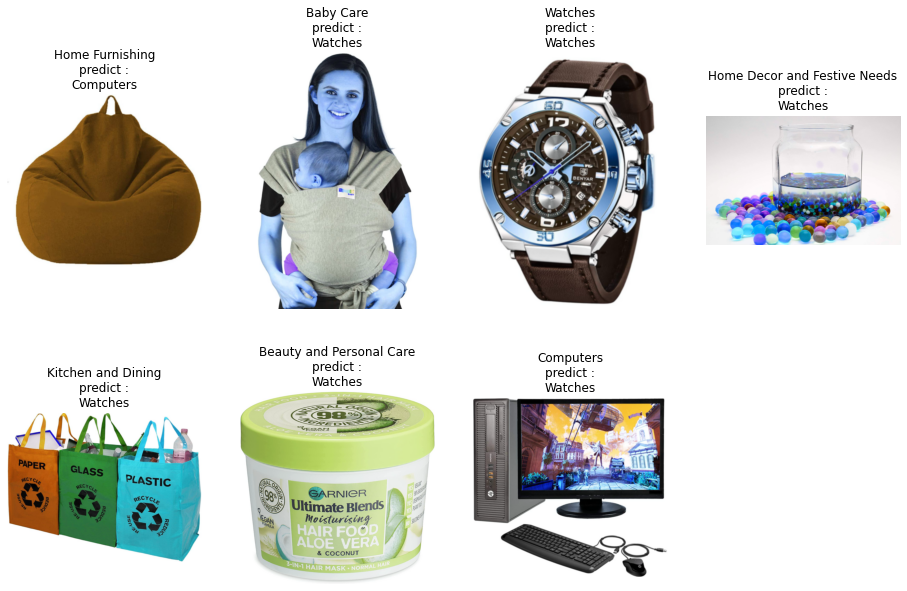

In [201]:
path_amaz = "Flipkart/amazon/"
sift = cv2.xfeatures2d.SIFT_create()

plt.figure(figsize=(16, 16))

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


for i, image_name in enumerate(df.category.unique(),1) :
    # load an image from file
    image = cv2.imread(path_amaz+image_name+'.jpg')
    image = cv2.GaussianBlur(image, (5, 5), 0)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    equal_img = cv2.equalizeHist(gray_img)   # equalize image histogram
    dsize = (224, 224)
    resize_image = cv2.resize(equal_img, dsize)
    kp, des = sift.detectAndCompute(resize_image, None)

    plt.subplot(3,4,i)
    plt.axis('off')
    plt.imshow(image)
    hist = build_histogram(kmeans_sift, des, 0) #calculates the histogram
    feat_pca = pca_sift.transform(hist.reshape(1,-1))
    predi = label_enc.inverse_transform(km_sift.predict(feat_pca))
    plt.title(image_name+"\npredict :\n"+predi[0])
    
#plt.savefig('P01_14_VGG16 amazon.jpg')
plt.show()

# transfert learning VGG16

## non supervisé extraction features

In [167]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras import Input
from keras import Model

# load model
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [168]:
# identification of key points and associated descriptors
import time, cv2

path = "Flipkart/Images/"
list_photos =  df_model['image'].values.tolist()

vgg_keypoints = []

temps1=time.time()

for image_num in range(len(list_photos)) :
    if image_num%50 == 0 : print(image_num)
    # load an image from file
    image = load_img(path+list_photos[image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    #reduction bruit
    image = cv2.GaussianBlur(image, (5, 5), 0)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    features = model.predict(image)
    vgg_keypoints.append(features)

vgg_keypoints_by_img = np.asarray(vgg_keypoints)
vgg_keypoints_all    = np.concatenate(vgg_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs VGG : ", vgg_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement VGG descriptor : ", "%15.2f" % duration1, "secondes")

0
50
100
150
200
250
300
350
400
450
500
550


C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



600
650
700
750
800
850

Nombre de descripteurs VGG :  (892, 4096)
temps de traitement VGG descriptor :           208.43 secondes


In [169]:
from sklearn import manifold, decomposition

print("Dimensions avant réduction PCA : ", vgg_keypoints_all.shape)
pca_vgg = decomposition.PCA(n_components=0.99)
feat_pca_vgg= pca_vgg.fit_transform(vgg_keypoints_all)
print("Dimensions après réduction PCA : ", feat_pca_vgg.shape)

Dimensions avant réduction PCA :  (892, 4096)
Dimensions après réduction PCA :  (892, 692)


In [170]:
from sklearn.cluster import KMeans

km_vgg = KMeans(n_clusters=7)
km_vgg.fit(vgg_keypoints_all)

km_vgg_acp = KMeans(n_clusters=7)
km_vgg_acp.fit(feat_pca_vgg)


KMeans(n_clusters=7)

## score ARI VGG16 extract Features + Kmeans : 0.434

In [172]:
from sklearn.metrics.cluster import adjusted_rand_score

ari = adjusted_rand_score(df_model['category'], km_vgg.labels_)
ari_acp = adjusted_rand_score(df_model['category'], km_vgg_acp.labels_)

print(f'ARI     : {ari:.3f}')
print(f'ARI ACP : {ari_acp:.3f}')


ARI     : 0.450
ARI ACP : 0.443


In [202]:
# identification of key points and associated descriptors
import time, cv2

path = "Flipkart/Images/"
list_photos_score =  df_score['image'].values.tolist()

vgg_score_keypoints = []

temps1=time.time()

for image_num in range(len(list_photos_score)) :
    if image_num%50 == 0 : print(image_num)
    # load an image from file
    image = load_img(path+list_photos[image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    #reduction bruit
    image = cv2.GaussianBlur(image, (5, 5), 0)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    features = model.predict(image)
    vgg_score_keypoints.append(features)

vgg_score_keypoints_by_img = np.asarray(vgg_score_keypoints)

duration1=time.time()-temps1
print("temps de traitement VGG descriptor : ", "%15.2f" % duration1, "secondes")

0
50
100
150
temps de traitement VGG descriptor :            36.56 secondes


In [203]:
vgg_score_keypoints_all = np.concatenate(vgg_score_keypoints_by_img, axis=0)
vgg_score_keypoints_all.shape

(158, 4096)

In [204]:
feat_pca_vgg_score = pca_vgg.transform(vgg_score_keypoints_all)

In [205]:
predict_score_vgg_acp = km_vgg_acp.predict(feat_pca_vgg_score)

In [206]:
conf_mat = confusion_matrix(df_score.category_label, predict_score_vgg_acp)
print(conf_mat)


[[ 3  6  0  9  2  2  1]
 [ 3  3  4  7  1  1  3]
 [ 2  3  7  7  1  1  2]
 [ 3  2  5  3 10  0  0]
 [ 5  3  1  9  3  2  0]
 [ 2  6  3  1  7  1  2]
 [10  7  4  0  0  1  0]]


In [208]:
from sklearn.metrics import classification_report

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 6, 5, 2, 0, 3, 4, 1]
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(df_score.category_label, predict_score_vgg_acp)
conf_mat = confusion_matrix(df_score.category_label, cls_labels_transform)
print(conf_mat)

accuracy_image_vgg_acp = accuracy_score(df_score.category_label, cls_labels_transform)
print()
print("ACCURACY SCORE VGG ACP: {:.3}".format(accuracy_image_vgg_acp))
print()

print()
print(classification_report(df_score.category_label, cls_labels_transform))

Correspondance des clusters calcul:  [6 6 2 0 3 0 1]
Correspondance des clusters :  [6, 5, 2, 0, 3, 4, 1]
[[ 9  1  0  2  2  6  3]
 [ 7  3  4  1  1  3  3]
 [ 7  2  7  1  1  3  2]
 [ 3  0  5 10  0  2  3]
 [ 9  0  1  3  2  3  5]
 [ 1  2  3  7  1  6  2]
 [ 0  0  4  0  1  7 10]]

ACCURACY SCORE VGG ACP: 0.297


              precision    recall  f1-score   support

           0       0.25      0.39      0.31        23
           1       0.38      0.14      0.20        22
           2       0.29      0.30      0.30        23
           3       0.42      0.43      0.43        23
           4       0.25      0.09      0.13        23
           5       0.20      0.27      0.23        22
           6       0.36      0.45      0.40        22

    accuracy                           0.30       158
   macro avg       0.31      0.30      0.28       158
weighted avg       0.31      0.30      0.28       158



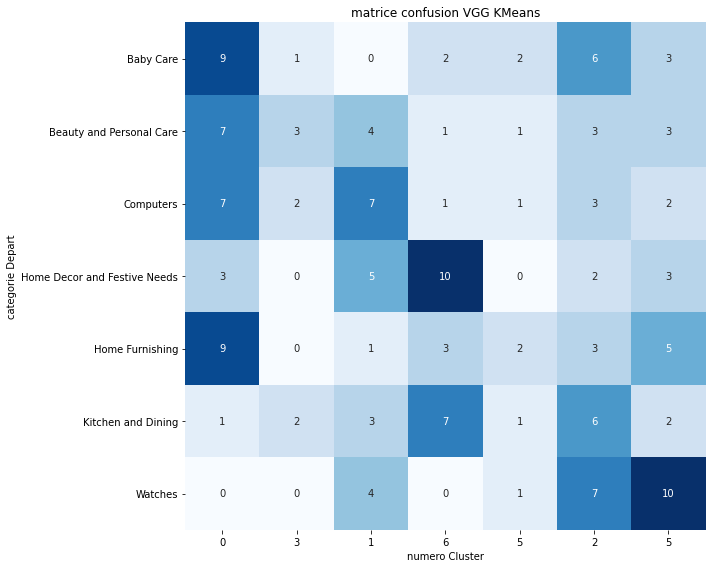

In [209]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 0, 3, 1, 6, 5, 2, 5])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion VGG KMeans')
plt.tight_layout()
plt.savefig('P01_23_confusionMatrix_vgg_acp.jpg')
plt.show()

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [210]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=40, 
                     n_iter=2000, init='random', random_state=1944)

X_tsne_sift = tsne.fit_transform(vgg_keypoints_all)
df_tsne_sift = pd.DataFrame(X_tsne_sift, columns=['tsne1', 'tsne2'])
print(X_tsne_sift.shape)


(892, 2)


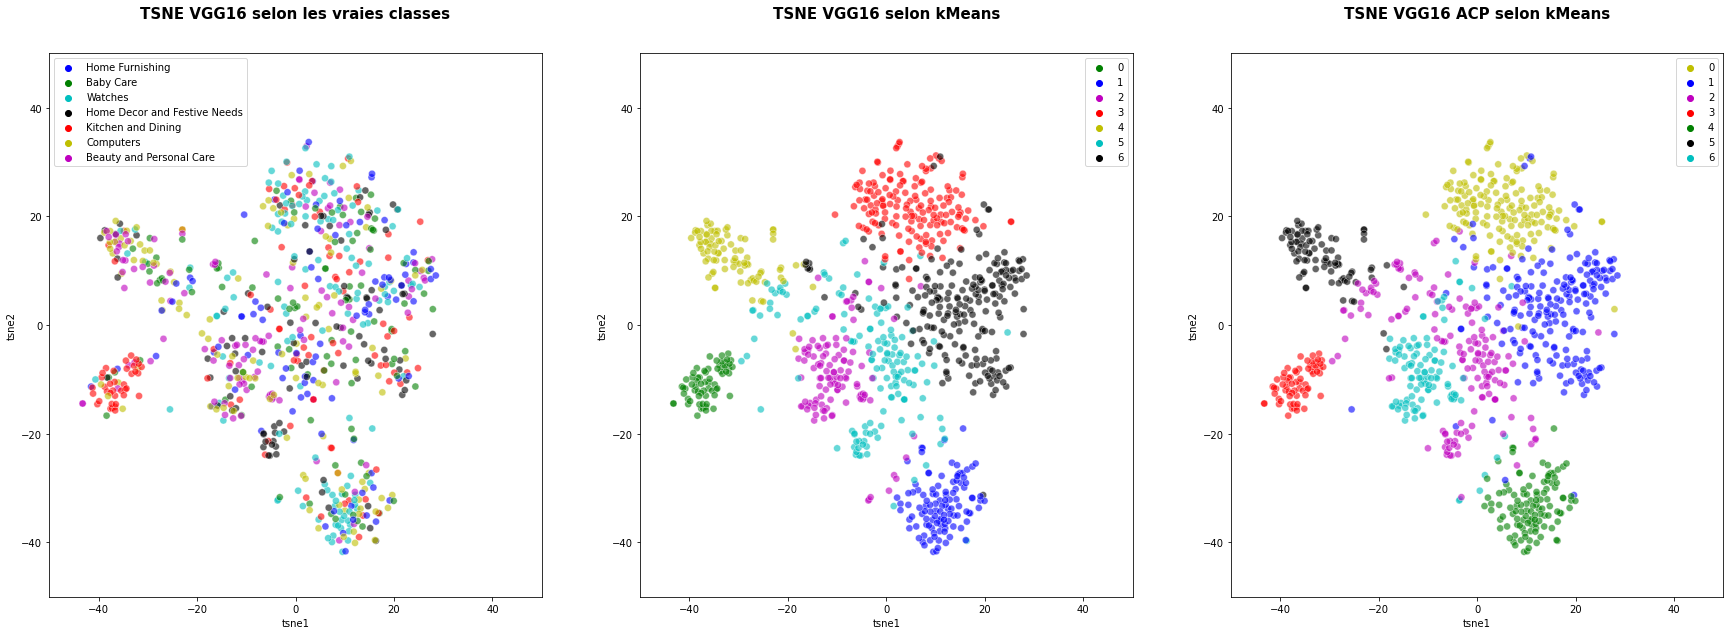

In [214]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
my_pal = {"Baby Care": "g", "Home Furnishing": "b", "Beauty and Personal Care":"m", "Kitchen and Dining": "r", 
          "Computers": "y", "Watches":"c", "Home Decor and Festive Needs":"k"}
#sns.scatterplot(   x="tsne1", y="tsne2", data=df_tsne_sift, legend="brief", hue=df.iloc[index_train,:]['category'], s=50, alpha=0.6, palette=my_pal)
sns.scatterplot(   x="tsne1", y="tsne2", data=df_tsne_sift, legend="brief", hue=df_model['category'], s=50, alpha=0.6, palette=my_pal)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.title('TSNE VGG16 selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.subplot(1,3,2)
my_pal = {0: "g", 1: "b", 2:"m", 3: "r", 4: "y", 5:"c", 6:"k"}
sns.scatterplot(   x="tsne1", y="tsne2", data=df_tsne_sift, legend="brief", hue=km_vgg.labels_, s=50, alpha=0.6, palette=my_pal)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.title('TSNE VGG16 selon kMeans', fontsize = 15, pad = 35, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.subplot(1,3,3)
my_pal = {0: "y", 1: "b", 2:"m", 3: "r", 4: "g", 5:"k", 6:"c"}
sns.scatterplot(   x="tsne1", y="tsne2", data=df_tsne_sift, legend="brief", hue=km_vgg_acp.labels_, s=50, alpha=0.6, palette=my_pal)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.title('TSNE VGG16 ACP selon kMeans', fontsize = 15, pad = 35, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.savefig('P01_11_VGG16_Kmeans.jpg')
plt.show()


In [215]:
from sklearn import manifold, decomposition

print("Dimensions bow avant réduction PCA : ", vgg_keypoints_all.shape)
pca_vgg_km = decomposition.PCA(n_components=3)
feat_pca_vgg_km= pca_vgg_km.fit_transform(vgg_keypoints_all)
print("Dimensions bow après réduction PCA : ", feat_pca_vgg_km.shape)

Dimensions bow avant réduction PCA :  (892, 4096)
Dimensions bow après réduction PCA :  (892, 3)


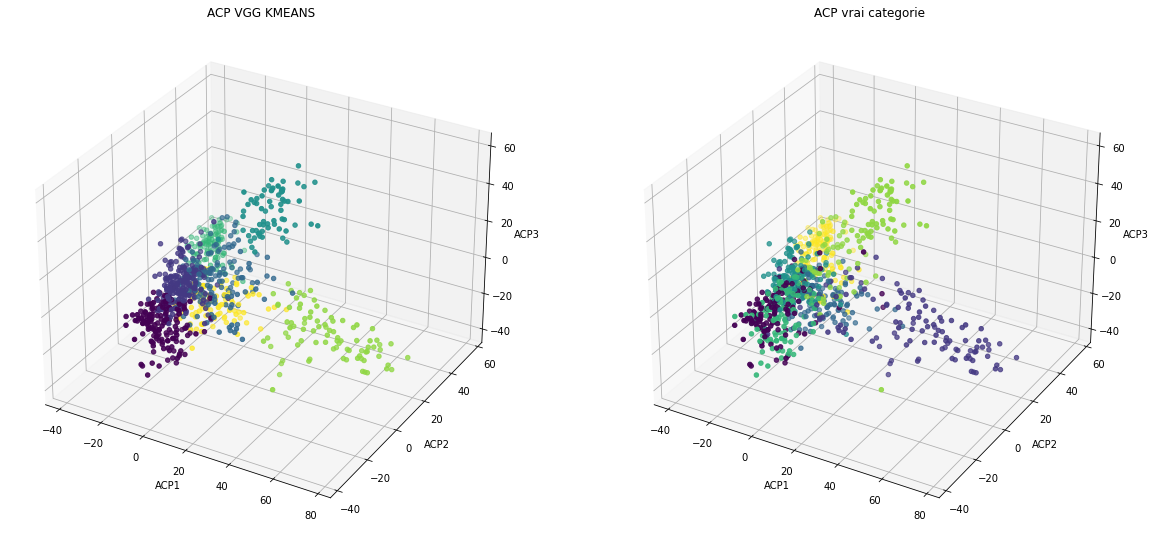

In [222]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(feat_pca_vgg_km[:,0], feat_pca_vgg_km[:,1], feat_pca_vgg_km[:,2], c = km_vgg_acp.labels_)
ax1.set_title("ACP VGG KMEANS")
ax1.set_xlabel("ACP1")
ax1.set_ylabel("ACP2")
ax1.set_zlabel("ACP3")
#ax.legend(loc="best")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(feat_pca_vgg_km[:,0], feat_pca_vgg_km[:,1], feat_pca_vgg_km[:,2], c = df_model.category_label)
ax2.set_title("ACP vrai categorie")
ax2.set_xlabel("ACP1")
ax2.set_ylabel("ACP2")
ax2.set_zlabel("ACP3")

plt.savefig('P01_25_ACP3D VGG Kmeans.jpg')
plt.show()

In [223]:
# identification of key points and associated descriptors
import time, cv2

path = "Flipkart/Images/"
list_photos =  df['image'].values.tolist()

vgg_final_keypoints = []

temps1=time.time()

for image_num in range(len(list_photos)) :
    if image_num%50 == 0 : print(image_num)
    # load an image from file
    image = load_img(path+list_photos[image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    #reduction bruit
    image = cv2.GaussianBlur(image, (5, 5), 0)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    features = model.predict(image)
    vgg_final_keypoints.append(features)

vgg_final_keypoints_by_img = np.asarray(vgg_final_keypoints)
vgg_final_keypoints_all = np.concatenate(vgg_final_keypoints_by_img, axis=0)

feat_pca_vgg_final = pca_vgg.transform(vgg_final_keypoints_all)
predict_final_vgg_acp = km_vgg_acp.predict(feat_pca_vgg_final)

duration1=time.time()-temps1
print("temps de traitement  : ", "%15.2f" % duration1, "secondes")



0
50
100
150
200
250
300
350
400
450
500
550
600
650


C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



700
750
800
850
900
950
1000
temps de traitement  :           241.61 secondes


In [224]:
df_final[['cluster_vgg_kmeans_label']] = predict_final_vgg_acp

In [225]:
df_final[['cluster_vgg_kmeans']] = label_enc.inverse_transform(df_final[['cluster_vgg_kmeans_label']])

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# essai regroupement deux predictions

In [236]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df_final.iloc[index_model,:][['cluster_tfidf','cluster_vgg_kmeans_label']],
                                                df.iloc[index_model,:]['category_label'], test_size=0.2, stratify=df.iloc[index_model,:]['category_label'], random_state=1944)

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rfc = OneVsRestClassifier(RandomForestClassifier())

rfc.fit(Xtrain, ytrain)
rfc.score(Xtest, ytest)

0.7821229050279329

In [238]:
from xgboost import XGBClassifier
xgb = OneVsRestClassifier(XGBClassifier())

xgb.fit(Xtrain, ytrain)
xgb.score(Xtest, ytest)

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:35:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\paps\anaconda3\envs\tf2\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



0.7821229050279329

In [239]:
svc_poly = SVC(kernel="poly", degree=3, coef0=1, C=5)

svc_poly.fit(Xtrain, ytrain)
print("SVM poly : ",svc_poly.score(Xtest, ytest))      

SVM poly :  0.7821229050279329


In [240]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'degree': np.arange(2, 7),
               'C': np.logspace(-1, 3)}

print(random_grid)

svc_poly = SVC(kernel="poly", coef0=1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svc_random = RandomizedSearchCV(estimator = svc_poly, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
svc_random.fit(Xtrain, ytrain.values.ravel())

print(svc_random.best_score_)
print(svc_random.best_params_)

{'degree': array([2, 3, 4, 5, 6]), 'C': array([1.00000000e-01, 1.20679264e-01, 1.45634848e-01, 1.75751062e-01,
       2.12095089e-01, 2.55954792e-01, 3.08884360e-01, 3.72759372e-01,
       4.49843267e-01, 5.42867544e-01, 6.55128557e-01, 7.90604321e-01,
       9.54095476e-01, 1.15139540e+00, 1.38949549e+00, 1.67683294e+00,
       2.02358965e+00, 2.44205309e+00, 2.94705170e+00, 3.55648031e+00,
       4.29193426e+00, 5.17947468e+00, 6.25055193e+00, 7.54312006e+00,
       9.10298178e+00, 1.09854114e+01, 1.32571137e+01, 1.59985872e+01,
       1.93069773e+01, 2.32995181e+01, 2.81176870e+01, 3.39322177e+01,
       4.09491506e+01, 4.94171336e+01, 5.96362332e+01, 7.19685673e+01,
       8.68511374e+01, 1.04811313e+02, 1.26485522e+02, 1.52641797e+02,
       1.84206997e+02, 2.22299648e+02, 2.68269580e+02, 3.23745754e+02,
       3.90693994e+02, 4.71486636e+02, 5.68986603e+02, 6.86648845e+02,
       8.28642773e+02, 1.00000000e+03])}
Fitting 3 folds for each of 40 candidates, totalling 120 fits
0.754

In [241]:
svc_poly = SVC(kernel="poly", degree=2, coef0=1, C=828.6)

svc_poly.fit(Xtrain, ytrain)
print("SVM poly : ",svc_poly.score(Xtest, ytest))      

SVM poly :  0.7821229050279329


In [242]:
predict_score_combinaison = svc_poly.predict(df_final.iloc[index_score,:][['cluster_tfidf','cluster_vgg_kmeans_label']])

In [243]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 0, 1, 2, 3, 4, 5, 6]
    print ("Correspondance des clusters : ", corresp)
    print()
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

conf_mat = confusion_matrix(df.iloc[index_score,:]['category_label'],  predict_score_combinaison)
print(conf_mat)
print()

cls_labels_transform = conf_mat_transform(df.iloc[index_score,:]['category_label'], predict_score_combinaison)
accuracy_combi = accuracy_score(df.iloc[index_score,:]['category_label'], cls_labels_transform)
print("ACCURACY SCORE COMBINAISON: {:.3}".format(accuracy_combi))
print()
conf_mat = confusion_matrix(df.iloc[index_score,:]['category_label'], cls_labels_transform)
print(conf_mat)
print()
print(classification_report(df.iloc[index_score,:]['category_label'], cls_labels_transform))

[[13  0  0  2  5  3  0]
 [ 1  8  3  1  0  9  0]
 [ 0  0  9  0  0 14  0]
 [ 0  0  0 19  0  4  0]
 [ 3  0  1  6 13  0  0]
 [ 0  0  0  1  0 21  0]
 [ 0  0  0  0  0  0 22]]

Correspondance des clusters calcul:  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0, 1, 2, 3, 4, 5, 6]

ACCURACY SCORE COMBINAISON: 0.665

[[13  0  0  2  5  3  0]
 [ 1  8  3  1  0  9  0]
 [ 0  0  9  0  0 14  0]
 [ 0  0  0 19  0  4  0]
 [ 3  0  1  6 13  0  0]
 [ 0  0  0  1  0 21  0]
 [ 0  0  0  0  0  0 22]]

              precision    recall  f1-score   support

           0       0.76      0.57      0.65        23
           1       1.00      0.36      0.53        22
           2       0.69      0.39      0.50        23
           3       0.66      0.83      0.73        23
           4       0.72      0.57      0.63        23
           5       0.41      0.95      0.58        22
           6       1.00      1.00      1.00        22

    accuracy                           0.66       158
   macro avg       0.75      0

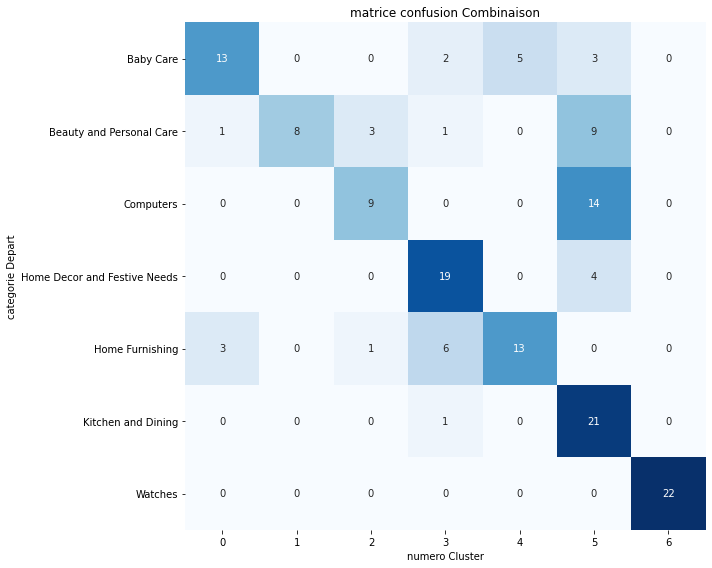

In [244]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 0, 1, 2, 3, 4, 5, 6])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion Combinaison')
plt.tight_layout()
plt.savefig('P01_24_confusionMatrix_combi.jpg')
plt.show()

# VGG16 en supervisé

In [281]:
df['category'].value_counts()

Baby Care                       150
Kitchen and Dining              150
Watches                         150
Home Decor and Festive Needs    150
Beauty and Personal Care        150
Home Furnishing                 150
Computers                       150
Name: category, dtype: int64

In [254]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, ytrain, yval =  train_test_split(df_model.image, df_model.category, test_size=0.15, stratify=df_model.category  , random_state=1944)
Xtest = df_score.image
ytest = df_score.category

In [255]:
print('Xtrain : ',Xtrain.shape[0])
print('Xval : ',Xval.shape[0])
print('Xtest : ',Xtest.shape[0])

Xtrain :  758
Xval :  134
Xtest :  158


In [259]:
#constititution des jeux entrainement, test, validation
import os
import shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'Flipkart/Images'

# The directory where we will
# store our smaller dataset
base_dir = 'Flipkart/minitrain'
os.mkdir(base_dir)

category0 = "Home Decor and Festive Needs"
category1 = "Computers"
category2 = "Kitchen and Dining"
category3 = "Home Furnishing"
category4 = "Baby Care"
category5 = "Beauty and Personal Care"
category6 = "Watches"

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


#train par categorie
train_cat0_dir = os.path.join(train_dir, category0)
os.mkdir(train_cat0_dir)
train_cat1_dir = os.path.join(train_dir, category1)
os.mkdir(train_cat1_dir)
train_cat2_dir = os.path.join(train_dir, category2)
os.mkdir(train_cat2_dir)
train_cat3_dir = os.path.join(train_dir, category3)
os.mkdir(train_cat3_dir)
train_cat4_dir = os.path.join(train_dir, category4)
os.mkdir(train_cat4_dir)
train_cat5_dir = os.path.join(train_dir, category5)
os.mkdir(train_cat5_dir)
train_cat6_dir = os.path.join(train_dir, category6)
os.mkdir(train_cat6_dir)

#validation par categorie
val_cat0_dir = os.path.join(validation_dir, category0)
os.mkdir(val_cat0_dir)
val_cat1_dir = os.path.join(validation_dir, category1)
os.mkdir(val_cat1_dir)
val_cat2_dir = os.path.join(validation_dir, category2)
os.mkdir(val_cat2_dir)
val_cat3_dir = os.path.join(validation_dir, category3)
os.mkdir(val_cat3_dir)
val_cat4_dir = os.path.join(validation_dir, category4)
os.mkdir(val_cat4_dir)
val_cat5_dir = os.path.join(validation_dir, category5)
os.mkdir(val_cat5_dir)
val_cat6_dir = os.path.join(validation_dir, category6)
os.mkdir(val_cat6_dir)

#validation par categorie
test_cat0_dir = os.path.join(test_dir, category0)
os.mkdir(test_cat0_dir)
test_cat1_dir = os.path.join(test_dir, category1)
os.mkdir(test_cat1_dir)
test_cat2_dir = os.path.join(test_dir, category2)
os.mkdir(test_cat2_dir)
test_cat3_dir = os.path.join(test_dir, category3)
os.mkdir(test_cat3_dir)
test_cat4_dir = os.path.join(test_dir, category4)
os.mkdir(test_cat4_dir)
test_cat5_dir = os.path.join(test_dir, category5)
os.mkdir(test_cat5_dir)
test_cat6_dir = os.path.join(test_dir, category6)
os.mkdir(test_cat6_dir)


for fname, label in zip(Xtrain, ytrain):
    path_cate = train_dir+'/'+label
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(path_cate, fname)
    shutil.copyfile(src, dst)

for fname, label in zip(Xval, yval):
    path_cate = validation_dir+'/'+label
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(path_cate, fname)
    shutil.copyfile(src, dst)

for fname, label in zip(Xtest, ytest):
    path_cate = test_dir+'/'+label
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(path_cate, fname)
    shutil.copyfile(src, dst)


In [282]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                 input_shape=(224, 224, 3))
#conv_base.summary()

In [283]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

print(train_dir)
train_features, train_labels = extract_features(train_dir, Xtrain.shape[0])
validation_features, validation_labels = extract_features(validation_dir, Xval.shape[0])
test_features, test_labels = extract_features(test_dir, Xtest.shape[0])


Flipkart/minitrain\train
Found 758 images belonging to 7 classes.
Found 134 images belonging to 7 classes.
Found 158 images belonging to 7 classes.


In [284]:
train_features = np.reshape(train_features, (Xtrain.shape[0], 7 * 7 * 512))
validation_features = np.reshape(validation_features, (Xval.shape[0], 7 * 7 * 512))
test_features = np.reshape(test_features, (Xtest.shape[0], 7 * 7 * 512))

In [285]:
from sklearn.preprocessing import OneHotEncoder

one_hot_train_labels = np.array(pd.get_dummies(train_labels))
one_hot_validation_labels = np.array(pd.get_dummies(validation_labels))
one_hot_test_labels = np.array(pd.get_dummies(test_labels))


In [322]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(7, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [323]:
history = model.fit(train_features, one_hot_train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, one_hot_validation_labels))

Epoch 1/30
38/38 [==============================] - 1s 35ms/step - loss: 1.8642 - accuracy: 0.2493 - val_loss: 1.6628 - val_accuracy: 0.5075
Epoch 2/30
38/38 [==============================] - 1s 33ms/step - loss: 1.5313 - accuracy: 0.4815 - val_loss: 1.3455 - val_accuracy: 0.5970
Epoch 3/30
38/38 [==============================] - 1s 31ms/step - loss: 1.2219 - accuracy: 0.6161 - val_loss: 1.1107 - val_accuracy: 0.6866
Epoch 4/30
38/38 [==============================] - 1s 31ms/step - loss: 1.0371 - accuracy: 0.6887 - val_loss: 0.9503 - val_accuracy: 0.7463
Epoch 5/30
38/38 [==============================] - 1s 33ms/step - loss: 0.9410 - accuracy: 0.7137 - val_loss: 0.8853 - val_accuracy: 0.7612
Epoch 6/30
38/38 [==============================] - 1s 35ms/step - loss: 0.8487 - accuracy: 0.7467 - val_loss: 0.8300 - val_accuracy: 0.7687
Epoch 7/30
38/38 [==============================] - 1s 32ms/step - loss: 0.7562 - accuracy: 0.7612 - val_loss: 0.7914 - val_accuracy: 0.7985
Epoch 8/30
38

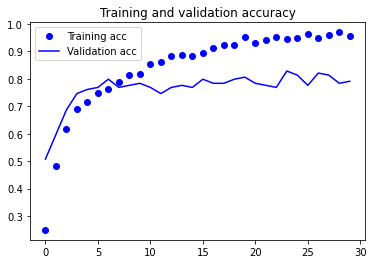

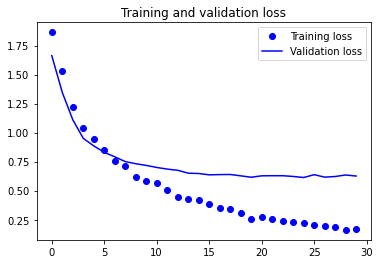

In [324]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('P01_12_VGG16_conv_base.jpg')

plt.show()

In [325]:
model.save("categorie_7_2.h5")

In [326]:
predict_classes_vgg_sigmoid = np.argmax(model.predict(test_features), axis=-1)

In [327]:
conf_mat = confusion_matrix(df_score.category_label, predict_classes_vgg_sigmoid)
print(conf_mat)


[[2 4 3 4 3 2 5]
 [2 1 6 2 2 4 5]
 [5 2 5 4 2 2 3]
 [2 3 6 2 3 2 5]
 [3 3 4 5 3 3 2]
 [3 2 3 3 7 2 2]
 [3 3 5 4 1 4 2]]


In [330]:
from sklearn.metrics import classification_report

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters calcul: ", corresp)
# corresp pour nom produit
    corresp = [ 2, 0, 1, 4, 5, 6, 3]
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(df_score.category_label, predict_classes_vgg_sigmoid)
conf_mat = confusion_matrix(df_score.category_label, cls_labels_transform)
print(conf_mat)

accuracy_image_vgg_sigmoid = accuracy_score(df_score.category_label, cls_labels_transform)
print()
print("ACCURACY SCORE VGG SIGMOID: {:.3}".format(accuracy_image_vgg_sigmoid))
print()

print()
print(classification_report(df_score.category_label, cls_labels_transform))

Correspondance des clusters calcul:  [2 0 1 4 5 1 0]
Correspondance des clusters :  [2, 0, 1, 4, 5, 6, 3]
[[4 3 2 5 4 3 2]
 [1 6 2 5 2 2 4]
 [2 5 5 3 4 2 2]
 [3 6 2 5 2 3 2]
 [3 4 3 2 5 3 3]
 [2 3 3 2 3 7 2]
 [3 5 3 2 4 1 4]]

ACCURACY SCORE VGG SIGMOID: 0.228


              precision    recall  f1-score   support

           0       0.22      0.17      0.20        23
           1       0.19      0.27      0.22        22
           2       0.25      0.22      0.23        23
           3       0.21      0.22      0.21        23
           4       0.21      0.22      0.21        23
           5       0.33      0.32      0.33        22
           6       0.21      0.18      0.20        22

    accuracy                           0.23       158
   macro avg       0.23      0.23      0.23       158
weighted avg       0.23      0.23      0.23       158



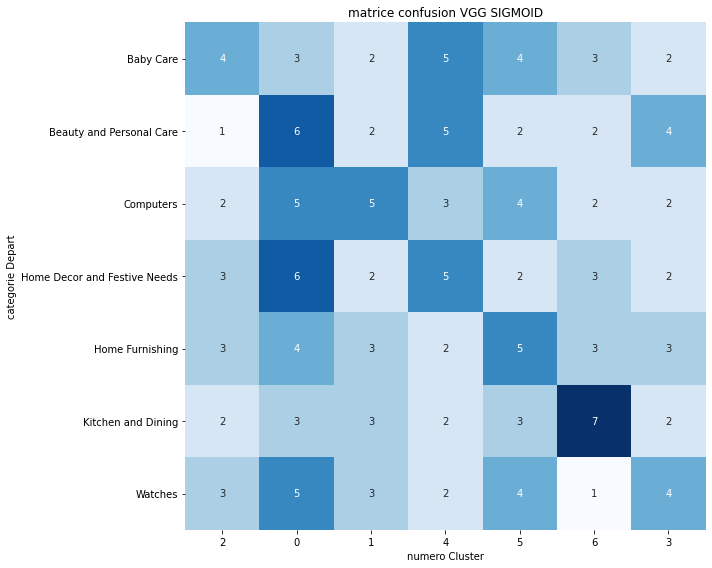

In [331]:
index_mat = label_enc.inverse_transform([ 0, 1, 2, 3, 4, 5, 6])

df_cm = pd.DataFrame(conf_mat, index = index_mat,
                  columns = [ 2, 0, 1, 4, 5, 6, 3])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title('matrice confusion VGG SIGMOID')
plt.tight_layout()
#plt.savefig('P01_23_confusionMatrix_vgg_acp.jpg')
plt.show()

# conclusion score

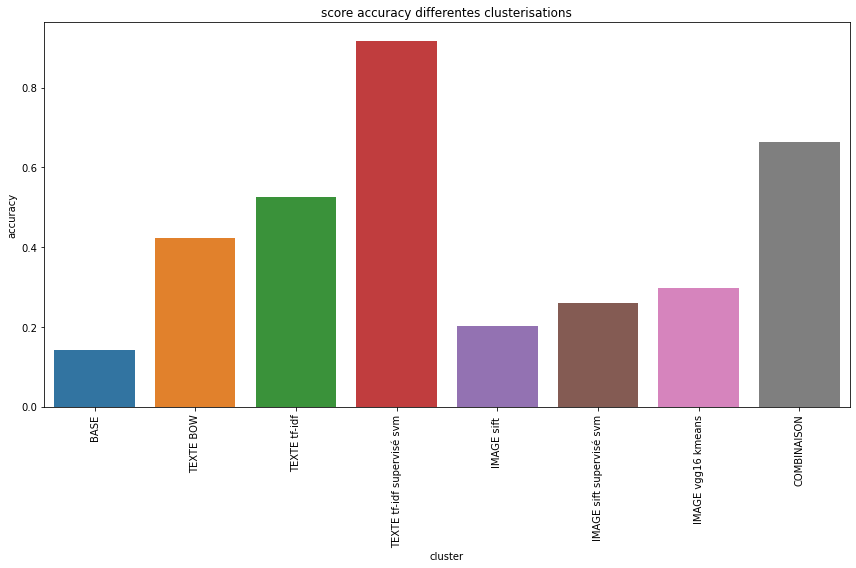

In [249]:
plt.figure(figsize=(12, 8))
sns.barplot(x = ['BASE', 'TEXTE BOW', 'TEXTE tf-idf', 'TEXTE tf-idf supervisé svm', 'IMAGE sift ', 'IMAGE sift supervisé svm', 'IMAGE vgg16 kmeans', 'COMBINAISON'],
            y = [0.143, accuracy_bow, accuracy_tf, accuracy_tf_supervise, accuracy_image_sift, accuracy_image_sift_svm, accuracy_image_vgg_acp, accuracy_combi])
plt.title('score accuracy differentes clusterisations')
plt.xlabel('cluster')
plt.ylabel('accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('P01_15_ARI final.jpg')
plt.show()